In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
path = 'C:\\Users\\JuhoSon\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothicCoding-Bold.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [4]:
pd.options.display.max_columns=30

In [5]:
df_shinhan = pd.read_csv('./data/innovation/shinhan/CARD_SPENDING/CARD_SPENDING_190809.txt', sep='	')

In [6]:
SH_rename_cols_dict = {'STD_DD':'DATE'}
df_shinhan.rename(columns=SH_rename_cols_dict, inplace=True)

In [7]:
df_shinhan.isnull().sum()

DATE          0
GU_CD         0
DONG_CD       0
MCT_CAT_CD    0
SEX_CD        0
AGE_CD        0
USE_CNT       0
USE_AMT       0
dtype: int64

In [43]:
len(df_shinhan)

2152963

# pk확인

In [45]:
len(df_shinhan.groupby(['DATE', 'GU_CD', 'DONG_CD', 'MCT_CAT_CD', 'SEX_CD', 'AGE_CD']).count())

2152963

# temp

In [9]:
'string'[0:3]

'str'

In [10]:
month_list = [str(i)[0:6] for i in df_shinhan.DATE]

In [11]:
df_shinhan['month']=month_list

In [12]:
month_amt = df_shinhan.groupby('month').sum()[['USE_AMT']]

In [13]:
month_amt = month_amt.sort_values(by='USE_AMT')

In [14]:
month_amt.USE_AMT.values

array([398346604, 418867114, 421833286, 424890807, 428068053, 428832545,
       435505194, 440405821, 441925987, 448137092, 468745701, 473585739],
      dtype=int64)

<BarContainer object of 12 artists>

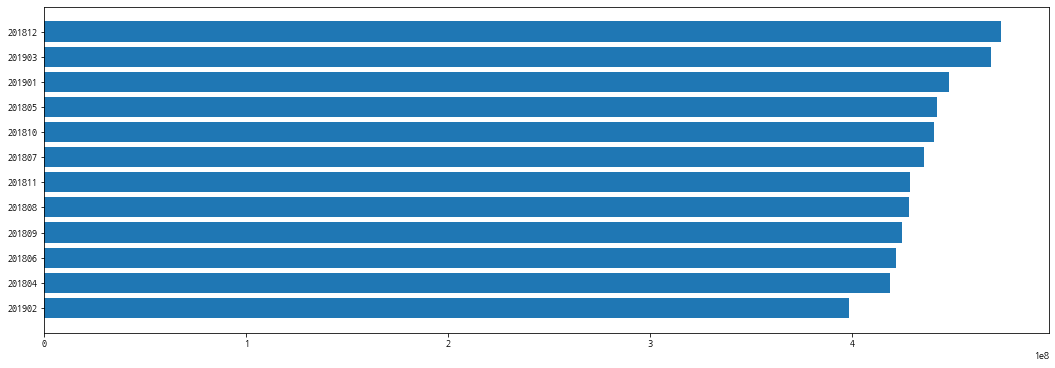

In [15]:
plt.figure(figsize=(18,6))
plt.barh(month_amt.index, month_amt.USE_AMT.values)

* Add GU_NM, DONG_NM

In [16]:
SH_DONG_NM_list = [str(df_shinhan.GU_CD[i])+str(df_shinhan.DONG_CD[i]) for i in range(len(df_shinhan))]

In [17]:
df_shinhan.DONG_CD = SH_DONG_NM_list

In [18]:
DONG_temp1 = list(df_shinhan.DONG_CD.unique())

In [19]:
DONG_temp2 = ["청운효자동","사직동", "삼청동", "부암동", "평창동", "무악동",
              "교남동", "가회동", "종로1.2.3.4가동", "종로5.6가동", "이화동",
              "혜화동", "창신1동", "창신2동", "창신3동", "숭인1동", "숭인2동",
              "월계1동", "월계2동", "월계3동", "공릉1동", "공릉2동", "하계1동",
              "하계2동", "중계본동", "중계1동", "중계4동", "중계2.3동", "상계1동",
              "상계2동", "상계3.4동", "상계5동", "상계6.7동", "상계8동", "상계9동", "상계10동"]

In [20]:
len(DONG_temp1), len(DONG_temp2)

(36, 36)

In [21]:
SH_GU_NM_dict = {110:'종로구', 350:'노원구'}
SH_DONG_NM_dict = dict()
for i in range(len(DONG_temp1)):
    SH_DONG_NM_dict[DONG_temp1[i]]=DONG_temp2[i]

In [22]:
SH_GU_NM_list = [SH_GU_NM_dict[i] for i in df_shinhan.GU_CD]

df_shinhan['GU_NM']=SH_GU_NM_list

In [23]:
SH_DONG_NM_list = [SH_DONG_NM_dict[i] for i in df_shinhan.DONG_CD]
df_shinhan['DONG_NM'] = SH_DONG_NM_list

# 업종별 매출액 높은 순 뽑기

In [24]:
df_USE_AMT_top = df_shinhan.groupby(['MCT_CAT_CD']).sum().reset_index().sort_values(by='USE_AMT', ascending=True)

In [25]:
top_list = list(df_USE_AMT_top.MCT_CAT_CD)

In [26]:
top_list_dict = {31:'전기_USE_AMT', 60:'자동차판매_USE_AMT', 30:'가구_USE_AMT', 34:'광학_USE_AMT', 32:'주방_USE_AMT',
           52:'사무통신_USE_AMT', 92:'수리서비스_USE_AMT', 21:'레저업소_USE_AMT', 43:'직물_USE_AMT', 22:'문화취미_USE_AMT',
           62:'자동차정비_USE_AMT', 35:'가전_USE_AMT', 44:'신변잡화_USE_AMT', 42:'의복_USE_AMT', 81:'음료식품_USE_AMT', 71:'보건위생_USE_AMT',
           50:'서적문구_USE_AMT', 33:'연료_USE_AMT', 70:'의료기관_USE_AMT', 40:'유통업_USE_AMT', 80:'요식업소_USE_AMT',
                10:'숙박_USE_AMT', 20:'레저용품_USE_AMT'}

In [27]:
top_list_name = [top_list_dict[i] for i in top_list]

In [28]:
df_USE_AMT_top['업종']=top_list_name

In [29]:
df_viz = df_USE_AMT_top[['업종', 'USE_AMT']].set_index('업종')

In [30]:
comma_f = lambda x:format(x, ',')

In [31]:
df_viz['USE_AMT_comma'] = df_viz.USE_AMT.map(comma_f)

([<matplotlib.axis.XTick at 0x2d7098b1780>,
 <a list of 23 Text xticklabel objects>)

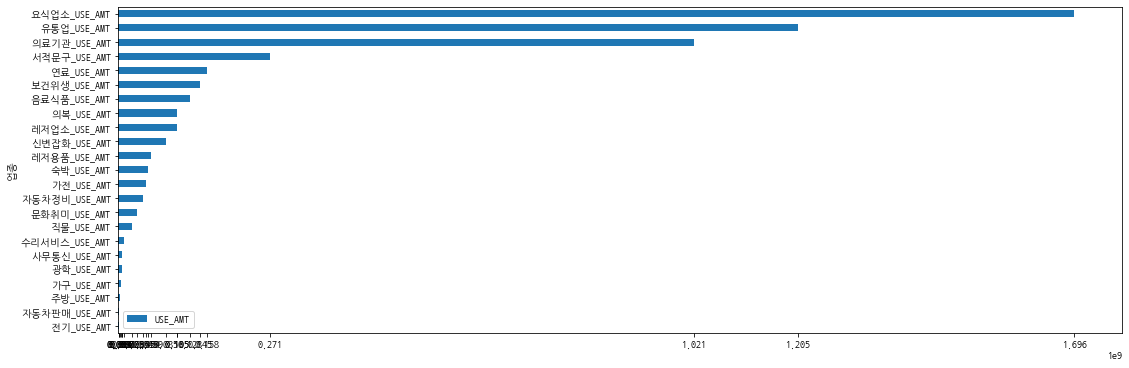

In [32]:
df_viz.plot(kind='barh', figsize=(18,6))
plt.legend()
plt.xticks(df_viz.USE_AMT.values)

In [33]:
df_USE_CNT_top = df_shinhan.groupby(['MCT_CAT_CD']).sum().reset_index().sort_values(by='USE_CNT', ascending=True)

In [34]:
top_list2 = list(df_USE_CNT_top.MCT_CAT_CD)

In [36]:
top_list_name2 = [top_list_dict[i] for i in top_list2]

In [37]:
df_USE_CNT_top['업종']=top_list_name2

In [38]:
df_viz2 = df_USE_CNT_top[['업종', 'USE_CNT']].set_index('업종')

In [39]:
df_viz2['USE_CNT_comma'] = df_viz2.USE_CNT.map(comma_f)

([<matplotlib.axis.XTick at 0x2d708a59940>,
 <a list of 23 Text xticklabel objects>)

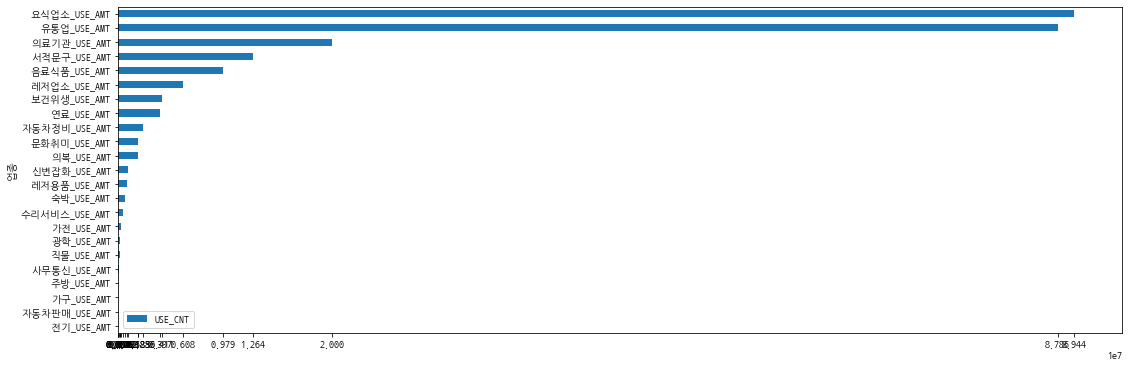

In [42]:
df_viz2.plot(kind='barh', figsize=(18,6))
plt.legend()
plt.xticks(df_viz2.USE_CNT.values)

# Load asos

In [33]:
df_asos_no15 = pd.read_csv('./data/innovation/asos/노원구/V10O1611104.csv')  # 상계 6, 7동


In [34]:
df_asos_no15['DATE'] = [str(df_asos_no15.tm[i])[:8] for i in range(len(df_asos_no15))]

In [35]:
drop_cols = ['serial', 'flag', 'co2', 'vocs', 'noise', 'temp', 'humi', 'Unnamed: 10', 'tm']
df_asos_no15.drop(drop_cols, axis=1, inplace=True)

In [36]:
df_asos_no15 = df_asos_no15.groupby('DATE').mean()
df_asos_no15 = df_asos_no15.reset_index()

In [37]:
df_asos_no15['GU_NM']=['노원구']*len(df_asos_no15)

In [38]:
df_asos_jong13 = pd.read_csv('./data/innovation/asos/종로구/V10O1611887.csv')  # 명동


In [39]:
df_asos_jong13['DATE'] = [str(df_asos_jong13.tm[i])[:8] for i in range(len(df_asos_jong13))]

In [40]:
drop_cols = ['serial', 'flag', 'co2', 'vocs', 'noise', 'temp', 'humi', 'Unnamed: 10', 'tm']
df_asos_jong13.drop(drop_cols, axis=1, inplace=True)

In [41]:
df_asos_jong13 = df_asos_jong13.groupby('DATE').mean()
df_asos_jong13 = df_asos_jong13.reset_index()

In [42]:
df_asos_jong13['GU_NM']=['종로구']*len(df_asos_jong13)

In [43]:
df_asos = pd.concat([df_asos_no15, df_asos_jong13]).groupby(['DATE', 'GU_NM']).sum().reset_index()

In [44]:
df_asos.head()

DATE GU_NM       pm10       pm25
0  20180401   노원구  68.328472  35.256944
1  20180401   종로구  84.070139  43.877083
2  20180402   노원구  72.005556  29.909028
3  20180402   종로구  72.274306  30.051389
4  20180403   노원구  72.838194  24.295833

# Load df_news

In [45]:
df_news = pd.read_csv('./data/innovation/df_news.csv')

### Merge

In [58]:
df_asos['DATE'] = df_asos.DATE.astype('int')

In [60]:
df_total = df_shinhan.merge(df_asos, on=['DATE', 'GU_NM'])

In [61]:
df_total = df_total.merge(df_news, on=['DATE'])

In [62]:
df_total.corr()  # USE_AMT와 직접적인 상관관계는 당연히 안보임

DATE     GU_CD  MCT_CAT_CD    AGE_CD   USE_CNT   USE_AMT  \
DATE        1.000000  0.001035    0.000828  0.007024 -0.001972  0.006404   
GU_CD       0.001035  1.000000    0.024424  0.011107 -0.048017 -0.048937   
MCT_CAT_CD  0.000828  0.024424    1.000000  0.032720  0.060080  0.069353   
AGE_CD      0.007024  0.011107    0.032720  1.000000 -0.100922  0.005704   
USE_CNT    -0.001972 -0.048017    0.060080 -0.100922  1.000000  0.755094   
USE_AMT     0.006404 -0.048937    0.069353  0.005704  0.755094  1.000000   
pm10        0.549075  0.093354    0.003657  0.006218 -0.004345  0.000880   
pm25        0.522957  0.039797    0.001273  0.004985 -0.001766  0.002992   
CONTENT     0.229700  0.000458    0.013956  0.008655  0.001178 -0.003342   

                pm10      pm25   CONTENT  
DATE        0.549075  0.522957  0.229700  
GU_CD       0.093354  0.039797  0.000458  
MCT_CAT_CD  0.003657  0.001273  0.013956  
AGE_CD      0.006218  0.004985  0.008655  
USE_CNT    -0.004345 -0.001766  0.001178  
USE_AMT     0.000880  0.002992 -0.003342  
pm10        1.000000  0.937407  0.332189  
pm25        0.937407  1.000000  0.290279  
CONTENT     0.332189  0.290279  1.000000

In [63]:
df_total.head()

DATE  GU_CD DONG_CD  MCT_CAT_CD SEX_CD  AGE_CD  USE_CNT  USE_AMT  \
0  20180401    110  110515          21      F      30        4      180   
1  20180401    110  110515          21      F      55        4       22   
2  20180401    110  110515          21      M      20       35      184   
3  20180401    110  110515          21      M      25       70      425   
4  20180401    110  110515          21      M      30       18       82   

    month GU_NM DONG_NM       pm10       pm25  CONTENT  
0  201804   종로구   청운효자동  84.070139  43.877083      515  
1  201804   종로구   청운효자동  84.070139  43.877083      515  
2  201804   종로구   청운효자동  84.070139  43.877083      515  
3  201804   종로구   청운효자동  84.070139  43.877083      515  
4  201804   종로구   청운효자동  84.070139  43.877083      515

In [64]:
df_total.shape

(2152963, 14)

# 정리
* 미세먼지와 카드이용금액과 횟수와는 상관관계가 보이지 않는다.

# Row to Column

* MCT_CAT_CD to column

In [65]:
df_GU_group = df_shinhan.groupby(['DATE', 'GU_NM', 'MCT_CAT_CD'
#                                ,'SEX_CD', 'AGE_CD'
                              ]).sum()

In [66]:
df_GU_group = pd.DataFrame(df_GU_group.USE_AMT)

In [67]:
df_GU_group = df_GU_group.unstack()

In [68]:
cols_name_list = ['숙박_USE_AMT', '레저용품_USE_AMT','레저업소_USE_AMT', '문화취미_USE_AMT', '가구_USE_AMT', '전기_USE_AMT',
                  '주방_USE_AMT', '연료_USE_AMT', '광학_USE_AMT', '가전_USE_AMT', '유통업_USE_AMT',
                  '의복_USE_AMT', '직물_USE_AMT', '신변잡화_USE_AMT','서적문구_USE_AMT', '사무통신_USE_AMT',
                  '자동차판매_USE_AMT', '자동차정비_USE_AMT', '의료기관_USE_AMT', '보건위생_USE_AMT', '요식업소_USE_AMT',
                  '음료식품_USE_AMT', '수리서비스_USE_AMT']

In [69]:
df_GU_group.columns = cols_name_list

In [70]:
df_GU_group.head()

숙박_USE_AMT  레저용품_USE_AMT  레저업소_USE_AMT  문화취미_USE_AMT  \
DATE     GU_NM                                                         
20180401 노원구       31269.0       58409.0      164077.0       40437.0   
         종로구      139861.0      101678.0       73920.0       70689.0   
20180402 노원구        8356.0       74469.0      203602.0       24220.0   
         종로구       85013.0       93722.0      183677.0       37989.0   
20180403 노원구       10365.0       56905.0      205303.0       17697.0   

                가구_USE_AMT  전기_USE_AMT  주방_USE_AMT  연료_USE_AMT  광학_USE_AMT  \
DATE     GU_NM                                                               
20180401 노원구       21890.0         NaN      2885.0    364178.0     13812.0   
         종로구           NaN        48.0      1974.0     21652.0      6411.0   
20180402 노원구        3449.0      2889.0      3547.0    408683.0      4620.0   
         종로구           NaN      2356.0      7557.0     29862.0      5267.0   
20180403 노원구        8468.0      3999.0     19196.0    369522.0      2961.0   

                가전_USE_AMT  유통업_USE_AMT  의복_USE_AMT  직물_USE_AMT  신변잡화_USE_AMT  \
DATE     GU_NM                                                                  
20180401 노원구       82798.0    3233209.0    111198.0      3804.0       29595.0   
         종로구        5655.0     630951.0    221297.0     24618.0      204555.0   
20180402 노원구       68076.0    2036790.0     97108.0       955.0       28998.0   
         종로구       41640.0     816620.0    253122.0     68581.0      246056.0   
20180403 노원구       56921.0    2127189.0    102555.0      6267.0       20211.0   

                서적문구_USE_AMT  사무통신_USE_AMT  자동차판매_USE_AMT  자동차정비_USE_AMT  \
DATE     GU_NM                                                             
20180401 노원구        101502.0         842.0            NaN        24501.0   
         종로구        776263.0        5322.0            NaN        34222.0   
20180402 노원구         87805.0        9346.0         5388.0       115142.0   
         종로구        572572.0       25334.0         5396.0        67448.0   
20180403 노원구         70669.0        2223.0        18559.0        54010.0   

                의료기관_USE_AMT  보건위생_USE_AMT  요식업소_USE_AMT  음료식품_USE_AMT  \
DATE     GU_NM                                                           
20180401 노원구        145582.0      280287.0     1833379.0      159468.0   
         종로구        335278.0      134692.0     2592842.0      108875.0   
20180402 노원구       1267814.0      225631.0     1200817.0      182162.0   
         종로구       2343706.0      131172.0     2523206.0      202107.0   
20180403 노원구       1324628.0      210332.0     1311857.0      173483.0   

                수리서비스_USE_AMT  
DATE     GU_NM                 
20180401 노원구          10236.0  
         종로구           3457.0  
20180402 노원구          33036.0  
         종로구          18594.0  
20180403 노원구          28567.0

In [71]:
df_shinhan_total_GU = df_GU_group.reset_index()

In [72]:
df_shinhan_total_GU.head()

DATE GU_NM  숙박_USE_AMT  레저용품_USE_AMT  레저업소_USE_AMT  문화취미_USE_AMT  \
0  20180401   노원구     31269.0       58409.0      164077.0       40437.0   
1  20180401   종로구    139861.0      101678.0       73920.0       70689.0   
2  20180402   노원구      8356.0       74469.0      203602.0       24220.0   
3  20180402   종로구     85013.0       93722.0      183677.0       37989.0   
4  20180403   노원구     10365.0       56905.0      205303.0       17697.0   

   가구_USE_AMT  전기_USE_AMT  주방_USE_AMT  연료_USE_AMT  광학_USE_AMT  가전_USE_AMT  \
0     21890.0         NaN      2885.0    364178.0     13812.0     82798.0   
1         NaN        48.0      1974.0     21652.0      6411.0      5655.0   
2      3449.0      2889.0      3547.0    408683.0      4620.0     68076.0   
3         NaN      2356.0      7557.0     29862.0      5267.0     41640.0   
4      8468.0      3999.0     19196.0    369522.0      2961.0     56921.0   

   유통업_USE_AMT  의복_USE_AMT  직물_USE_AMT  신변잡화_USE_AMT  서적문구_USE_AMT  \
0    3233209.0    111198.0      3804.0       29595.0      101502.0   
1     630951.0    221297.0     24618.0      204555.0      776263.0   
2    2036790.0     97108.0       955.0       28998.0       87805.0   
3     816620.0    253122.0     68581.0      246056.0      572572.0   
4    2127189.0    102555.0      6267.0       20211.0       70669.0   

   사무통신_USE_AMT  자동차판매_USE_AMT  자동차정비_USE_AMT  의료기관_USE_AMT  보건위생_USE_AMT  \
0         842.0            NaN        24501.0      145582.0      280287.0   
1        5322.0            NaN        34222.0      335278.0      134692.0   
2        9346.0         5388.0       115142.0     1267814.0      225631.0   
3       25334.0         5396.0        67448.0     2343706.0      131172.0   
4        2223.0        18559.0        54010.0     1324628.0      210332.0   

   요식업소_USE_AMT  음료식품_USE_AMT  수리서비스_USE_AMT  
0     1833379.0      159468.0        10236.0  
1     2592842.0      108875.0         3457.0  
2     1200817.0      182162.0        33036.0  
3     2523206.0      202107.0        18594.0  
4     1311857.0      173483.0        28567.0

In [73]:
df_shinhan_total_GU.shape

(730, 25)

# plot by time-JongRo

In [74]:
df_total_jongro = df_shinhan_total_GU.iloc[np.where(df_shinhan_total_GU.GU_NM=='종로구')[0]]

In [75]:
dateIdx = pd.date_range('2018-04-01', '2019-03-31')

df_total_jongro.index = dateIdx

In [76]:
drop_cols = ['DATE', 'GU_NM']
df_total_jongro.drop(drop_cols, inplace=True, axis=1)

C:\Users\JuhoSon\Miniconda3\envs\2019BigC\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### April

In [77]:
march_idx = pd.date_range('2018-04-01', '2018-04-30')
time_4 = df_total_jongro.loc[march_idx]

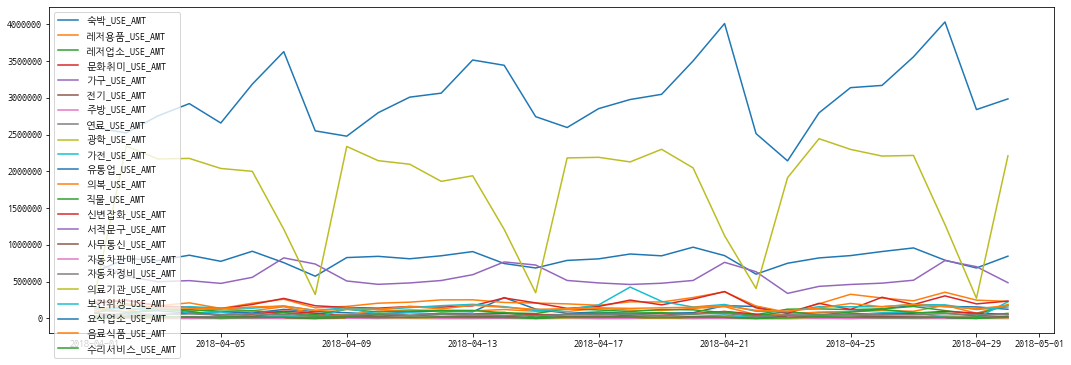

In [78]:
plt.figure(figsize=(18,6))
plt.plot(time_4.index, time_4)
plt.legend(time_4.columns)

In [79]:
print('오름차순 매출순위 \n', top_list_name)

오름차순 매출순위 
 ['전기_USE_AMT', '자동차판매_USE_AMT', '주방_USE_AMT', '가구_USE_AMT', '광학_USE_AMT', '사무통신_USE_AMT', '수리서비스_USE_AMT', '직물_USE_AMT', '문화취미_USE_AMT', '자동차정비_USE_AMT', '가전_USE_AMT', '숙박_USE_AMT', '레저용품_USE_AMT', '신변잡화_USE_AMT', '레저업소_USE_AMT', '의복_USE_AMT', '음료식품_USE_AMT', '보건위생_USE_AMT', '연료_USE_AMT', '서적문구_USE_AMT', '의료기관_USE_AMT', '유통업_USE_AMT', '요식업소_USE_AMT']


([<matplotlib.axis.XTick at 0x20682265c50>,
 <a list of 23 Text xticklabel objects>)

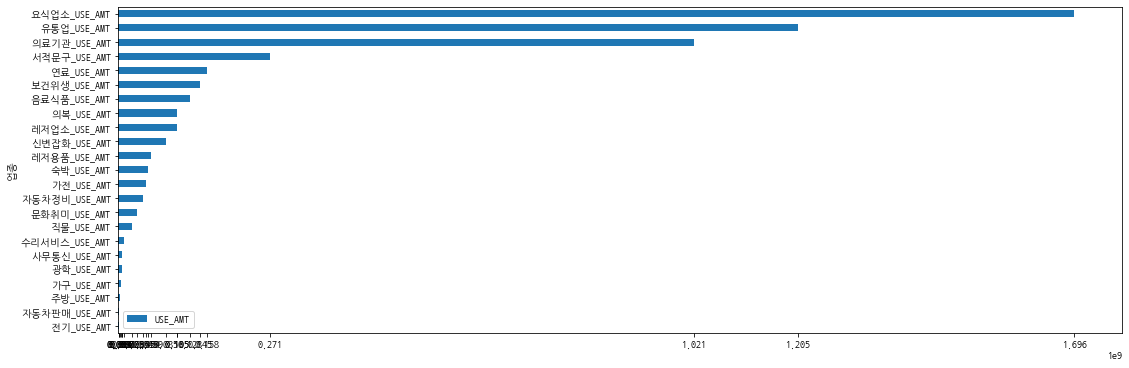

In [80]:
df_viz.plot(kind='barh', figsize=(18,6),)
plt.legend()
plt.xticks(df_viz.USE_AMT.values)

In [81]:
top5_cols = ['요식업소_USE_AMT', 
             '유통업_USE_AMT',
            '의료기관_USE_AMT',
            '연료_USE_AMT',
             '서적문구_USE_AMT'
            ]

([<matplotlib.axis.YTick at 0x20682a2a080>,
 <a list of 5 Text yticklabel objects>)

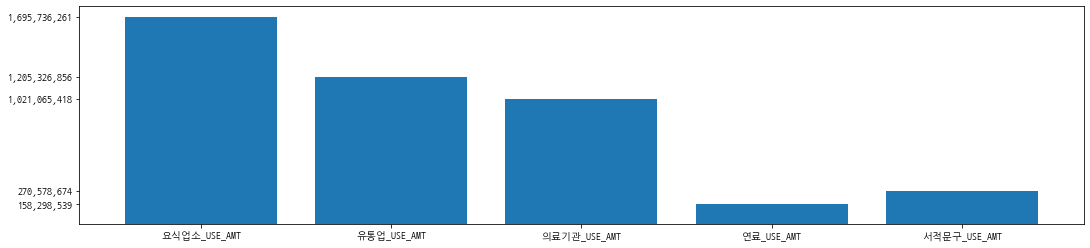

In [82]:
plt.figure(figsize=(18, 4))
plt.bar(df_viz.loc[top5_cols].index, df_viz.loc[top5_cols]['USE_AMT'].values)
plt.yticks(df_viz.loc[top5_cols].USE_AMT.values, df_viz.loc[top5_cols].USE_AMT_comma.values)

Text(0, 0.5, '매출금액')

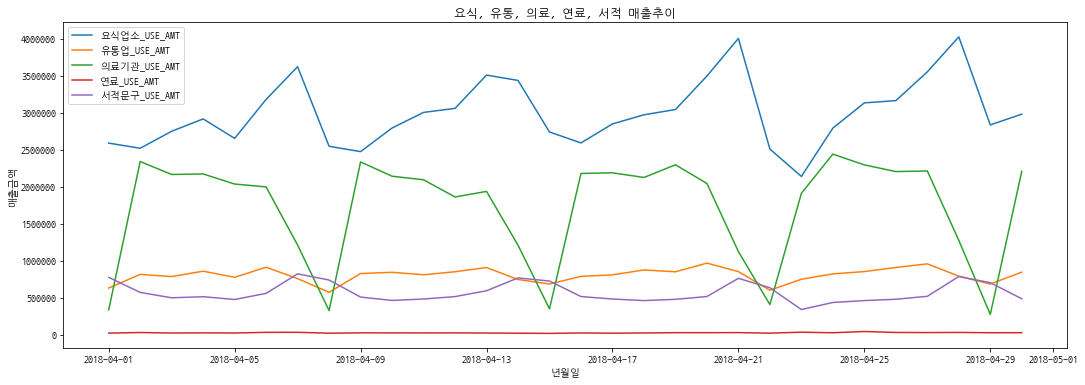

In [83]:
plt.figure(figsize=(18,6))
plt.plot(time_4.index, time_4[top5_cols])
plt.legend(top5_cols)
plt.title('요식, 유통, 의료, 연료, 서적 매출추이')
plt.xlabel('년월일')
plt.ylabel('매출금액')

In [84]:
middle_cols = [
    '보건위생_USE_AMT', 
             '음료식품_USE_AMT',
            '의복_USE_AMT',
            '레저업소_USE_AMT',
    '신변잡화_USE_AMT'
              ]

([<matplotlib.axis.YTick at 0x20680328240>,
 <a list of 5 Text yticklabel objects>)

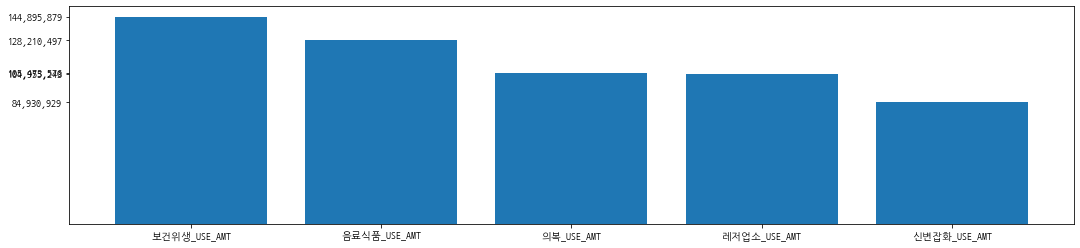

In [85]:
plt.figure(figsize=(18, 4))
plt.bar(df_viz.loc[middle_cols].index, df_viz.loc[middle_cols]['USE_AMT'].values)
plt.yticks(df_viz.loc[middle_cols].USE_AMT.values, df_viz.loc[middle_cols].USE_AMT_comma.values)

Text(0, 0.5, '매출금액')

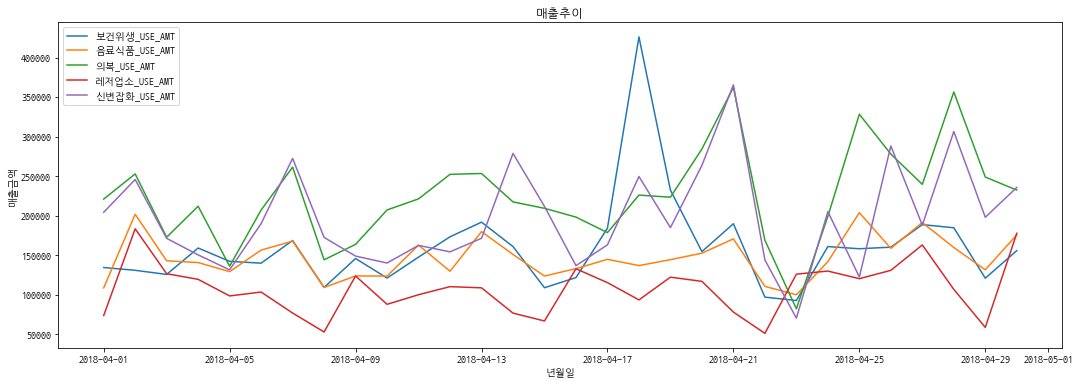

In [56]:
plt.figure(figsize=(18,6))
plt.plot(time_4.index, time_4[middle_cols])
plt.legend(middle_cols)
plt.title('매출추이')
plt.xlabel('년월일')
plt.ylabel('매출금액')

##### 연료는 분명 매출4위였는데  종로에서는 작다.

Text(0, 0.5, '매출금액')

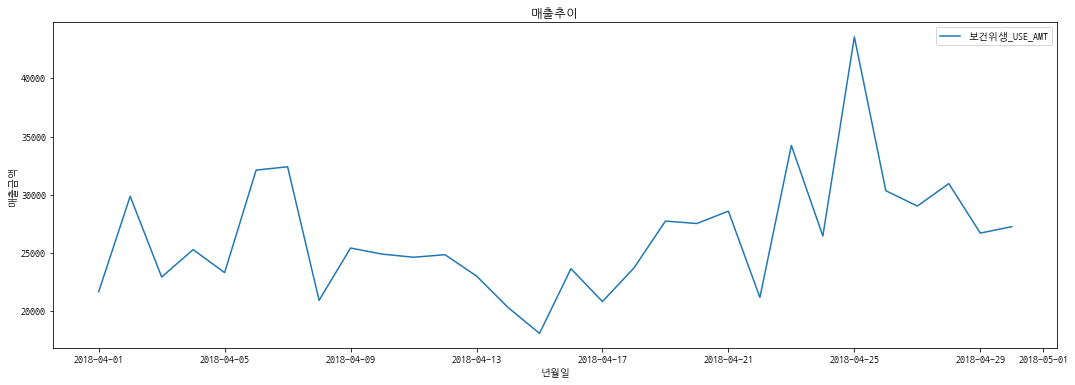

In [57]:
plt.figure(figsize=(18,6))
plt.plot(time_4.index, time_4['연료_USE_AMT'])
plt.legend(middle_cols)
plt.title('매출추이')
plt.xlabel('년월일')
plt.ylabel('매출금액')

In [58]:
middle_low_cols = ['레저용품_USE_AMT',
                    '숙박_USE_AMT',
                   '가전_USE_AMT',
             '자동차정비_USE_AMT',
             '문화취미_USE_AMT',
             '직물_USE_AMT',
#              '수리서비스_USE_AMT',
#              '사무통신_USE_AMT'
                  ]

([<matplotlib.axis.YTick at 0x1aa561219b0>,
 <a list of 6 Text yticklabel objects>)

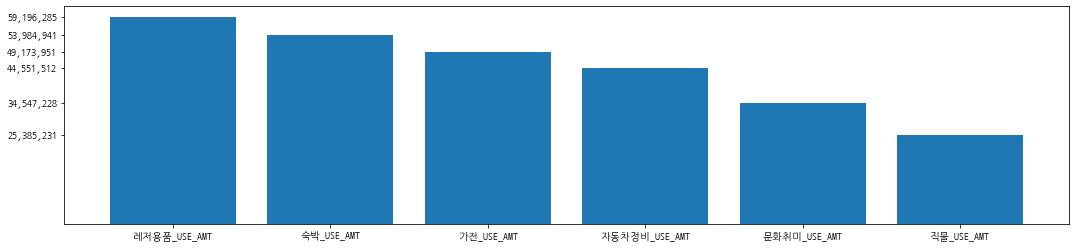

In [59]:
plt.figure(figsize=(18, 4))
plt.bar(df_viz.loc[middle_low_cols].index, df_viz.loc[middle_low_cols]['USE_AMT'].values)
plt.yticks(df_viz.loc[middle_low_cols].USE_AMT.values, df_viz.loc[middle_low_cols].USE_AMT_comma.values)

Text(0, 0.5, '매출금액')

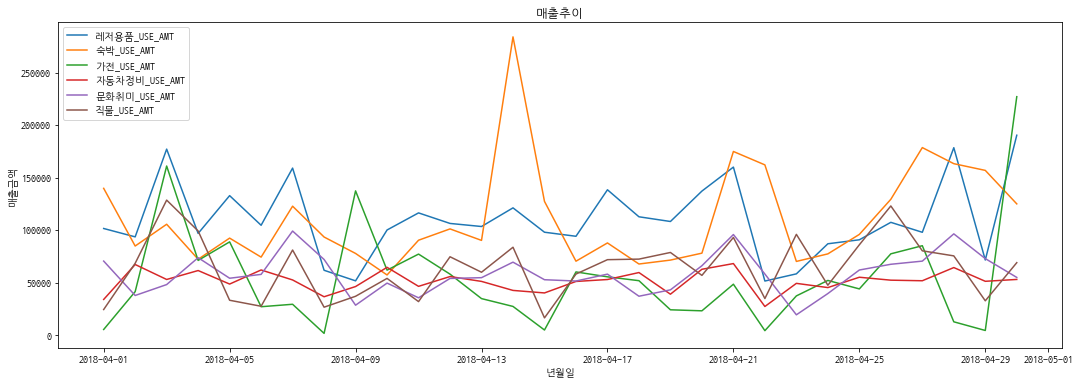

In [60]:
plt.figure(figsize=(18,6))
plt.plot(time_4.index, time_4[middle_low_cols])
plt.legend(middle_low_cols)
plt.title('매출추이')
plt.xlabel('년월일')
plt.ylabel('매출금액')

In [61]:
else_cols = [
#     '레저_USE_AMT',
             '수리서비스_USE_AMT',
    '사무통신_USE_AMT',
             '주방_USE_AMT',
             '광학_USE_AMT',
             '가구_USE_AMT',
             '자동차판매_USE_AMT',
             '전기_USE_AMT'
            ]

([<matplotlib.axis.YTick at 0x1aa5621b2b0>,
 <a list of 7 Text yticklabel objects>)

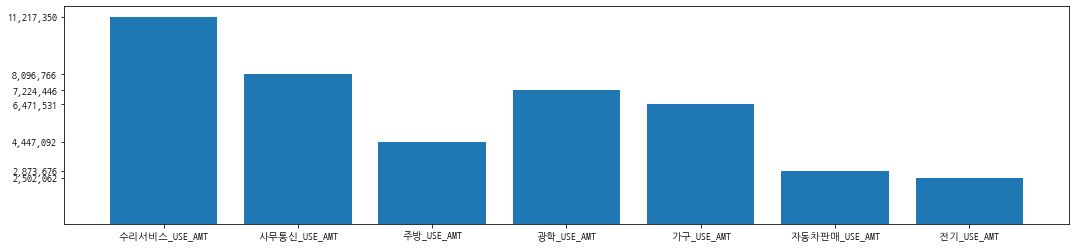

In [62]:
plt.figure(figsize=(18, 4))
plt.bar(df_viz.loc[else_cols].index, df_viz.loc[else_cols]['USE_AMT'].values)
plt.yticks(df_viz.loc[else_cols].USE_AMT.values, df_viz.loc[else_cols].USE_AMT_comma.values)

Text(0, 0.5, '매출금액')

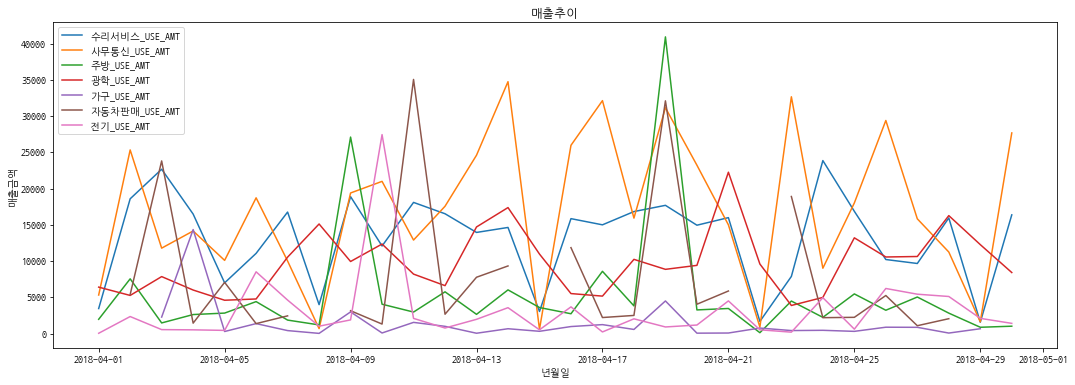

In [63]:
plt.figure(figsize=(18,6))
plt.plot(time_4.index, time_4[else_cols])
plt.legend(else_cols)
plt.title('매출추이')
plt.xlabel('년월일')
plt.ylabel('매출금액')

# plot by time-NoWon

In [107]:
df_total_nowon = df_shinhan_total_GU.iloc[np.where(df_shinhan_total_GU.GU_NM=='노원구')[0]]

In [108]:
dateIdx = pd.date_range('2018-04-01', '2019-03-31')

df_total_nowon.index = dateIdx

In [109]:
drop_cols = ['DATE', 'GU_NM']
df_total_nowon.drop(drop_cols, inplace=True, axis=1)

C:\Users\JuhoSon\Miniconda3\envs\2019BigC\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### April

In [110]:
march_idx = pd.date_range('2018-04-01', '2018-04-30')
time_4_nowon = df_total_nowon.loc[march_idx]

In [39]:
# time_4_nowon = df_total_nowon

C:\Users\JuhoSon\Miniconda3\envs\2019BigC\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


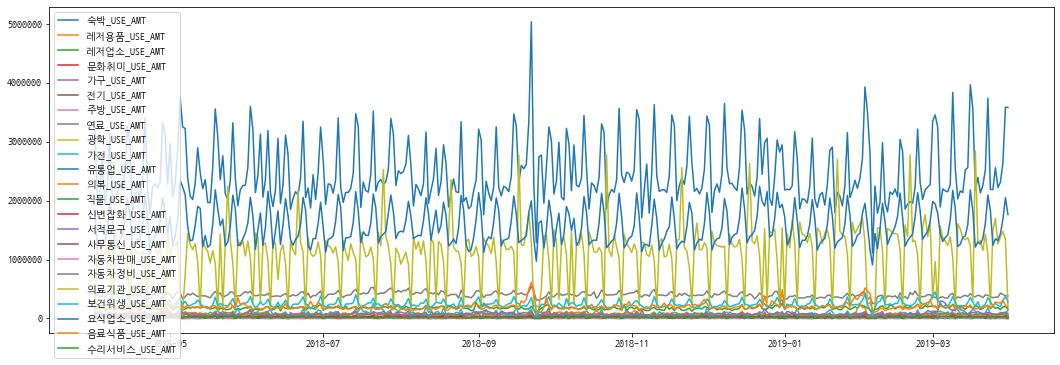

In [40]:
plt.figure(figsize=(18,6))
plt.plot(time_4_nowon.index, time_4_nowon)
plt.legend(time_4_nowon.columns)

In [41]:
print('오름차순 매출순위 \n', top_list_name)

오름차순 매출순위 
 ['전기_USE_AMT', '자동차판매_USE_AMT', '주방_USE_AMT', '가구_USE_AMT', '광학_USE_AMT', '사무통신_USE_AMT', '수리서비스_USE_AMT', '직물_USE_AMT', '문화취미_USE_AMT', '자동차정비_USE_AMT', '가전_USE_AMT', '숙박_USE_AMT', '레저용품_USE_AMT', '신변잡화_USE_AMT', '레저업소_USE_AMT', '의복_USE_AMT', '음료식품_USE_AMT', '보건위생_USE_AMT', '연료_USE_AMT', '서적문구_USE_AMT', '의료기관_USE_AMT', '유통업_USE_AMT', '요식업소_USE_AMT']


([<matplotlib.axis.XTick at 0x2068364a128>,
 <a list of 23 Text xticklabel objects>)

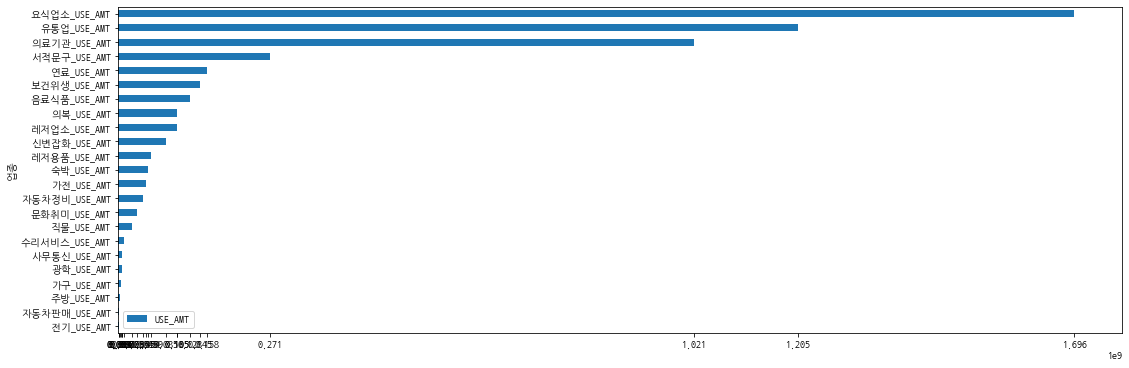

In [86]:
df_viz.plot(kind='barh', figsize=(18,6),)
plt.legend()
plt.xticks(df_viz.USE_AMT.values)

([<matplotlib.axis.YTick at 0x1aa5650dd68>,
 <a list of 5 Text yticklabel objects>)

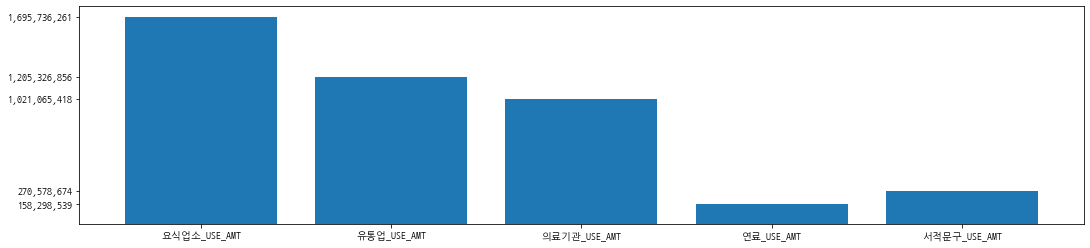

In [65]:
plt.figure(figsize=(18, 4))
plt.bar(df_viz.loc[top5_cols].index, df_viz.loc[top5_cols]['USE_AMT'].values)
plt.yticks(df_viz.loc[top5_cols].USE_AMT.values, df_viz.loc[top5_cols].USE_AMT_comma.values)

Text(0, 0.5, '매출금액')

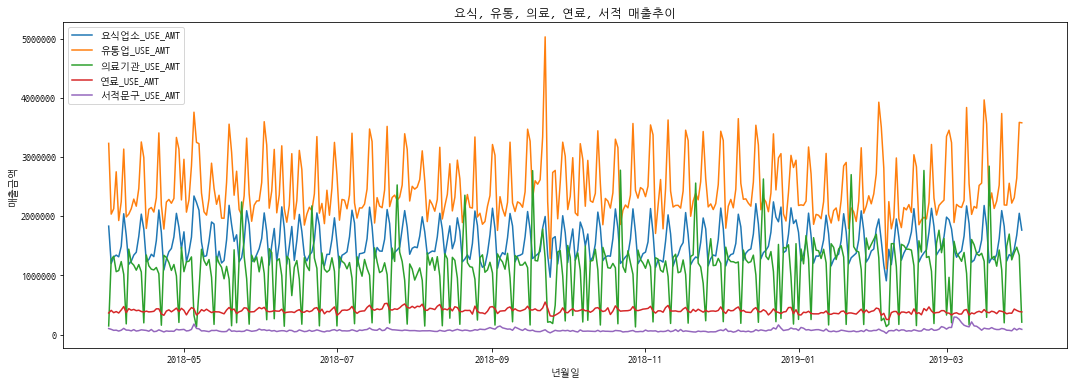

In [66]:
plt.figure(figsize=(18,6))
plt.plot(time_4_nowon.index, time_4_nowon[top5_cols])
plt.legend(top5_cols)
plt.title('요식, 유통, 의료, 연료, 서적 매출추이')
plt.xlabel('년월일')
plt.ylabel('매출금액')

([<matplotlib.axis.YTick at 0x1aa56a4fb00>,
 <a list of 5 Text yticklabel objects>)

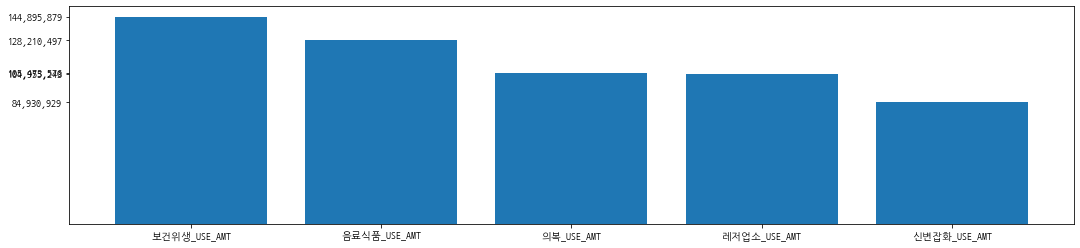

In [67]:
plt.figure(figsize=(18, 4))
plt.bar(df_viz.loc[middle_cols].index, df_viz.loc[middle_cols]['USE_AMT'].values)
plt.yticks(df_viz.loc[middle_cols].USE_AMT.values, df_viz.loc[middle_cols].USE_AMT_comma.values)

Text(0, 0.5, '매출금액')

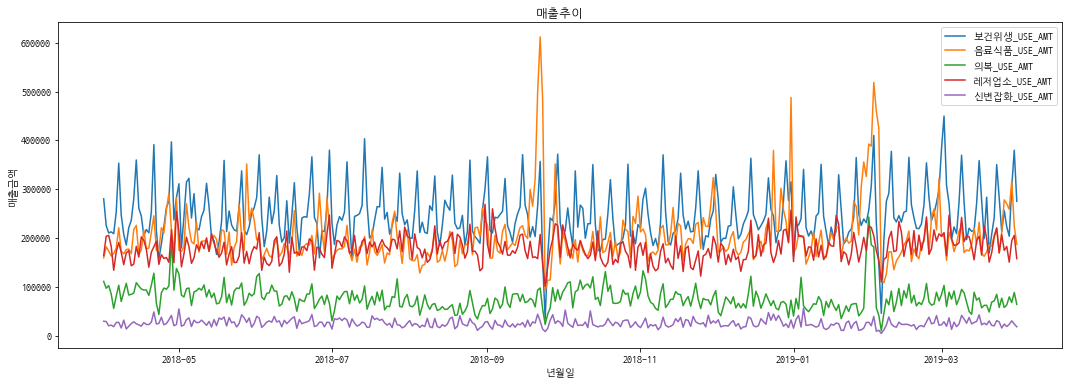

In [68]:
plt.figure(figsize=(18,6))
plt.plot(time_4_nowon.index, time_4_nowon[middle_cols])
plt.legend(middle_cols)
plt.title('매출추이')
plt.xlabel('년월일')
plt.ylabel('매출금액')

##### 통합데이터에선 서적문구가 높았는데 노원에서는 TOP에 끼지못한다

Text(0, 0.5, '매출금액')

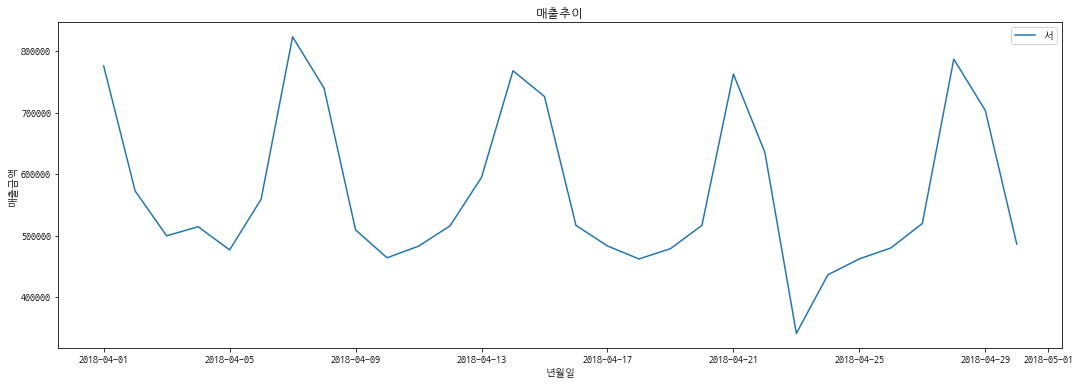

In [69]:
plt.figure(figsize=(18,6))
plt.plot(time_4.index, time_4['서적문구_USE_AMT'])
plt.legend('서적문구')
plt.title('매출추이')
plt.xlabel('년월일')
plt.ylabel('매출금액')

([<matplotlib.axis.YTick at 0x1aa58a61b70>,
 <a list of 6 Text yticklabel objects>)

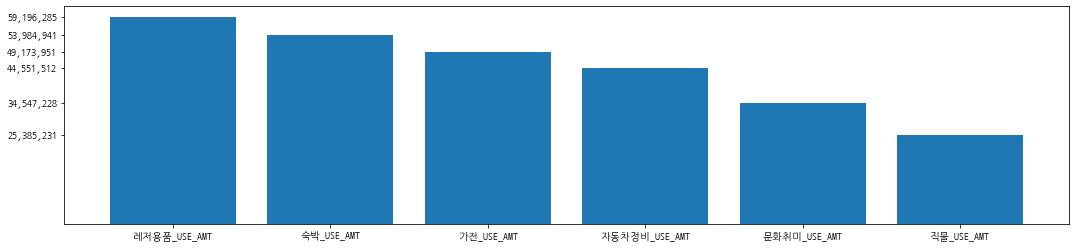

In [70]:
plt.figure(figsize=(18, 4))
plt.bar(df_viz.loc[middle_low_cols].index, df_viz.loc[middle_low_cols]['USE_AMT'].values)
plt.yticks(df_viz.loc[middle_low_cols].USE_AMT.values, df_viz.loc[middle_low_cols].USE_AMT_comma.values)

Text(0, 0.5, '매출금액')

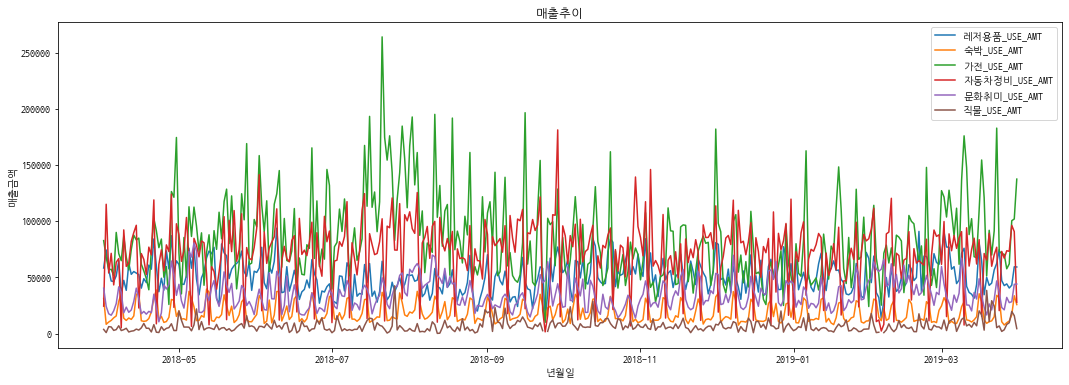

In [71]:
plt.figure(figsize=(18,6))
plt.plot(time_4_nowon.index, time_4_nowon[middle_low_cols])
plt.legend(middle_low_cols)
plt.title('매출추이')
plt.xlabel('년월일')
plt.ylabel('매출금액')

([<matplotlib.axis.YTick at 0x1aa588e3da0>,
 <a list of 7 Text yticklabel objects>)

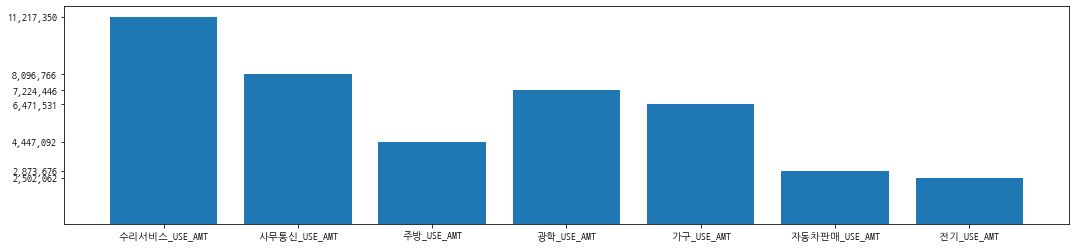

In [72]:
plt.figure(figsize=(18, 4))
plt.bar(df_viz.loc[else_cols].index, df_viz.loc[else_cols]['USE_AMT'].values)
plt.yticks(df_viz.loc[else_cols].USE_AMT.values, df_viz.loc[else_cols].USE_AMT_comma.values)

Text(0, 0.5, '매출금액')

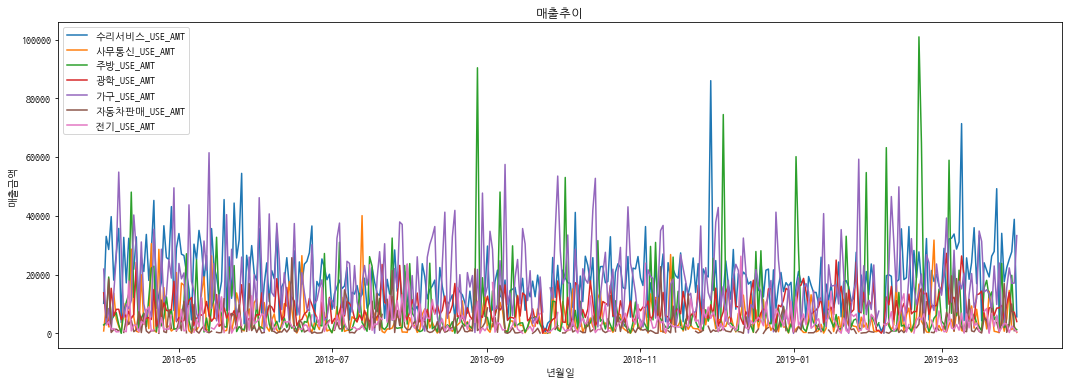

In [73]:
plt.figure(figsize=(18,6))
plt.plot(time_4_nowon.index, time_4_nowon[else_cols])
plt.legend(else_cols)
plt.title('매출추이')
plt.xlabel('년월일')
plt.ylabel('매출금액')

Text(0, 0.5, '매출금액')

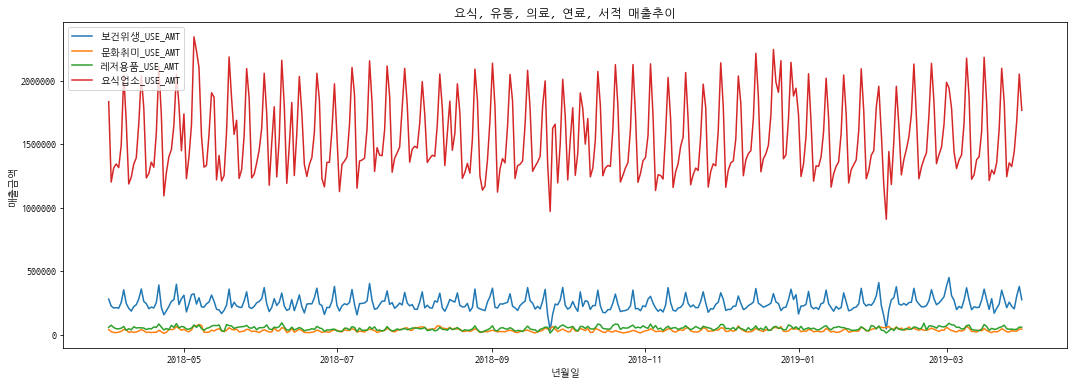

In [78]:
plt.figure(figsize=(18,6))
plt.plot(time_4_nowon.index, time_4_nowon[['보건위생_USE_AMT', '문화취미_USE_AMT', '레저용품_USE_AMT', '요식업소_USE_AMT']])
plt.legend(['보건위생_USE_AMT', '문화취미_USE_AMT', '레저용품_USE_AMT', '요식업소_USE_AMT'])
plt.title('요식, 유통, 의료, 연료, 서적 매출추이')
plt.xlabel('년월일')
plt.ylabel('매출금액')

# 일별 나이별 경향

In [87]:
df_total.head()

DATE  GU_CD DONG_CD  MCT_CAT_CD SEX_CD  AGE_CD  USE_CNT  USE_AMT  \
0  20180401    110  110515          21      F      30        4      180   
1  20180401    110  110515          21      F      55        4       22   
2  20180401    110  110515          21      M      20       35      184   
3  20180401    110  110515          21      M      25       70      425   
4  20180401    110  110515          21      M      30       18       82   

    month GU_NM DONG_NM       pm10       pm25  CONTENT  
0  201804   종로구   청운효자동  84.070139  43.877083      515  
1  201804   종로구   청운효자동  84.070139  43.877083      515  
2  201804   종로구   청운효자동  84.070139  43.877083      515  
3  201804   종로구   청운효자동  84.070139  43.877083      515  
4  201804   종로구   청운효자동  84.070139  43.877083      515

In [88]:
df_age = df_total.groupby(['DATE', 'AGE_CD']).sum()[['USE_AMT']]

In [89]:
df_age = df_age.unstack()

In [90]:
df_age.columns

MultiIndex(levels=[['USE_AMT'], [20, 25, 30, 35, 40, 45, 50, 55, 60, 65]],
           codes=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]],
           names=[None, 'AGE_CD'])

In [91]:
df_age.columns = ['-25_USE_AMT',
                 '2529_USE_AMT', '3034_USE_AMT',
                 '3539_USE_AMT', '4044_USE_AMT',
                 '4549_USE_AMT', '5054_USE_AMT',
                 '5559_USE_AMT', '6064_USE_AMT',
                 '65-_USE_AMT']

In [92]:
dateidx = pd.date_range('2018-04-01', '2019-03-31')
df_age.index=dateidx

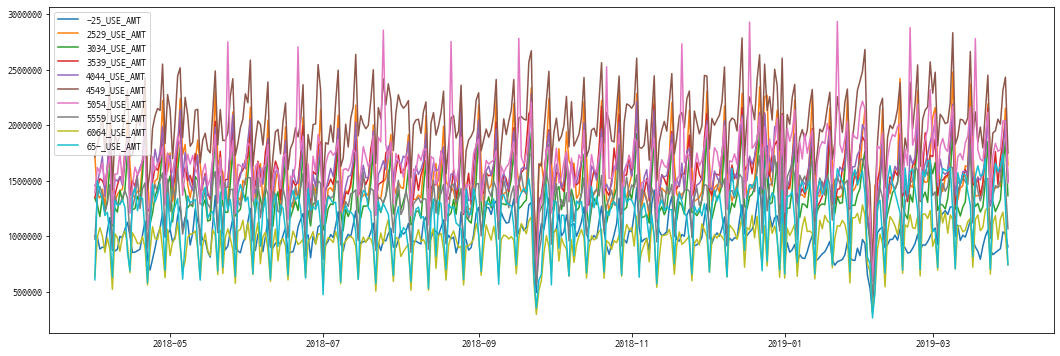

In [93]:
plt.figure(figsize=(18,6))
plt.plot(df_age.index, df_age)
plt.legend(df_age.columns)

# 인구순위

In [94]:
age_list = [
    '-25_USE_AMT', '2529_USE_AMT',
         '3034_USE_AMT', '3539_USE_AMT',
            '4044_USE_AMT', '4549_USE_AMT', 
         '5054_USE_AMT', '5559_USE_AMT',
            '6064_USE_AMT', '65-_USE_AMT'
        ]

In [95]:
df_age.T

2018-04-01  2018-04-02  2018-04-03  2018-04-04  2018-04-05  \
-25_USE_AMT      1001645      991466      884129      901878      900279   
2529_USE_AMT     1727526     1372664     1344864     1423431     1271686   
3034_USE_AMT     1344238     1283543     1177149     1354604     1217059   
3539_USE_AMT     1347351     1443964     1519086     1501900     1441838   
4044_USE_AMT     1459798     1481891     1587894     1719296     1358891   
4549_USE_AMT     1716170     1823554     1914571     2097936     1758489   
5054_USE_AMT     1391392     1619576     1570510     1661213     1464636   
5559_USE_AMT      973890     1348383     1448327     1378502     1214528   
6064_USE_AMT      638395      990666     1076957     1001741      853737   
65-_USE_AMT       607213     1498193     1394583     1331388     1186859   

              2018-04-06  2018-04-07  2018-04-08  2018-04-09  2018-04-10  \
-25_USE_AMT      1052761     1169978      878178      866668      883252   
2529_USE_AMT     1612438     2017820     1442153     1308607     1379039   
3034_USE_AMT     1327728     1677330     1093829     1252530     1218021   
3539_USE_AMT     1622351     1788704     1171892     1373028     1460191   
4044_USE_AMT     1638077     1926730     1159359     1515012     1496933   
4549_USE_AMT     2032756     2391823     1421881     1914614     1842926   
5054_USE_AMT     1606877     1735928     1111269     1560661     1561405   
5559_USE_AMT     1296642     1467364      872085     1359772     1287074   
6064_USE_AMT      984714      877342      520432     1023304      984018   
65-_USE_AMT      1215419     1000456      629796     1320371     1279544   

              2018-04-11  2018-04-12  2018-04-13  2018-04-14  2018-04-15  ...  \
-25_USE_AMT       999052      987267     1063387     1125722     1000426  ...   
2529_USE_AMT     1409990     1422629     1692351     2043897     1642278  ...   
3034_USE_AMT     1414674     1316979     1425528     1751425     1320499  ...   
3539_USE_AMT     1537536     1520849     1764372     1881438     1372781  ...   
4044_USE_AMT     1535299     1459344     1680770     1902012     1384673  ...   
4549_USE_AMT     1901619     1921677     2159415     2322680     1725981  ...   
5054_USE_AMT     1751081     1474811     1764780     1786237     1207242  ...   
5559_USE_AMT     1290222     1353357     1409761     1344470      994578  ...   
6064_USE_AMT      864526      996318     1045850      924783      671667  ...   
65-_USE_AMT      1288273     1327001     1262144      853949      688600  ...   

              2019-03-17  2019-03-18  2019-03-19  2019-03-20  2019-03-21  \
-25_USE_AMT       968383      903625      864807      792531      910324   
2529_USE_AMT     1773436     1359654     1369411     1362897     1465976   
3034_USE_AMT     1355741     1269141     1296586     1217841     1267804   
3539_USE_AMT     1480714     1439878     1533251     1365596     1481536   
4044_USE_AMT     1545596     1459705     1526396     1507513     1580108   
4549_USE_AMT     1904769     2120727     1845658     1984592     1796011   
5054_USE_AMT     1592141     2782219     1778414     1695885     1675656   
5559_USE_AMT     1117835     1528709     1410007     1318590     1403084   
6064_USE_AMT      720560     1150275     1193277     1050295     1079663   
65-_USE_AMT       816895     1542944     1635883     1542088     1552122   

              2019-03-22  2019-03-23  2019-03-24  2019-03-25  2019-03-26  \
-25_USE_AMT       999621     1057050      875184      833973      852867   
2529_USE_AMT     1758696     2193815     1669157     1424673     1431936   
3034_USE_AMT     1491571     1852931     1359972     1309118     1222088   
3539_USE_AMT     1753102     2157606     1283087     1502661     1762214   
4044_USE_AMT     1692294     2116423     1272043     1423918     1649982   
4549_USE_AMT     2131129     2452167     1655648     1931496     1950677   
5054_USE_AMT     1911310     2116388     1331727     1727162     1838144   
555

In [96]:
age_top_list = [df_age.T.loc[i].sum() for i in df_age.T.index]

In [97]:
df_age_top = pd.DataFrame(df_age.T.index, age_top_list)


In [98]:
df_age_top['SUM'] = df_age_top.index

In [99]:
df_age_top = df_age_top.set_index(df_age.T.index)
df_age_top.drop(0, axis=1, inplace=True)

In [100]:
df_age_top = df_age_top.sort_values(by='SUM', ascending=False)

C:\Users\JuhoSon\Miniconda3\envs\2019BigC\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


([<matplotlib.axis.YTick at 0x206836678d0>,
 <a list of 10 Text yticklabel objects>)

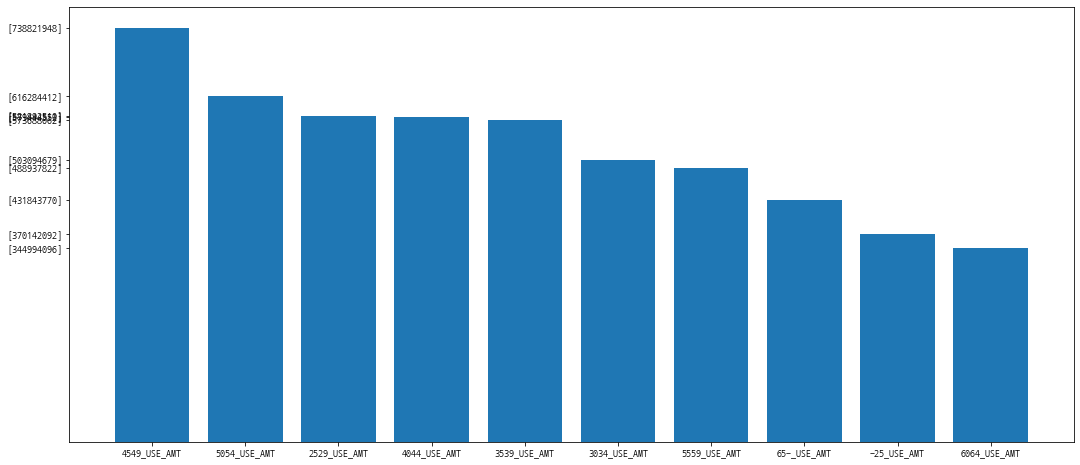

In [101]:
plt.figure(figsize=(18,8))
plt.bar(df_age_top.index, df_age_top['SUM'])
plt.yticks(df_age_top.values, df_age_top.values)

### 나이별 plot

In [102]:
age20 = [
    '-25_USE_AMT', '2529_USE_AMT',
#          '3034_USE_AMT', '3539_USE_AMT',
#             '4044_USE_AMT', '4549_USE_AMT', 
#          '5054_USE_AMT', '5559_USE_AMT',
#             '6064_USE_AMT', '65-_USE_AMT'
        ]

Text(0.5, 1.0, '일별 나이별 매출경향')

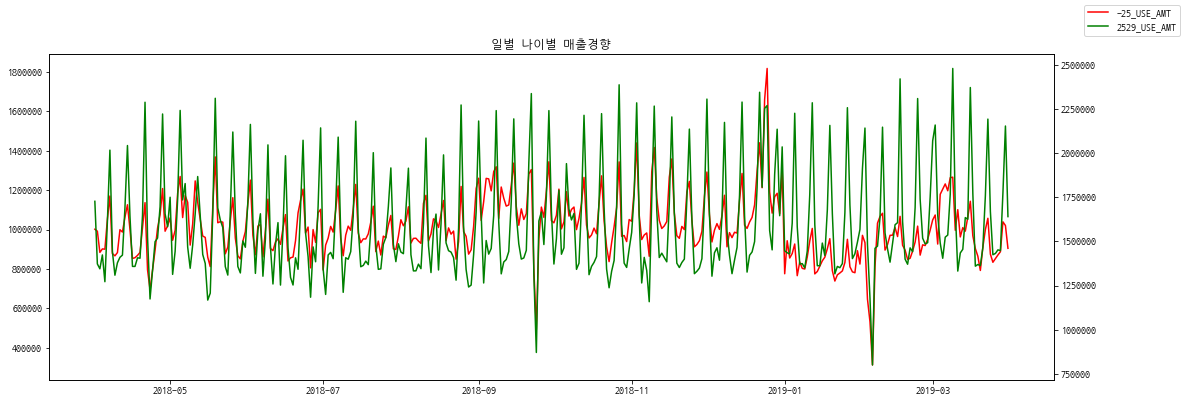

In [103]:
fig, ax1 = plt.subplots(figsize=(18,6))
ax2 = ax1.twinx()
ax1.plot(df_age.index, df_age['-25_USE_AMT'], 'r-')
ax2.plot(df_age.index, df_age['2529_USE_AMT'],'g-')
# ax1.legend('-25_USE_AMT')
# ax2.legend('2529_USE_AMT')
fig.legend(age20)
ax1.set_title('일별 나이별 매출경향')

In [104]:
age30 = [
#     '-25_USE_AMT', '2529_USE_AMT',
         '3034_USE_AMT', '3539_USE_AMT',
#             '4044_USE_AMT', '4549_USE_AMT', 
#          '5054_USE_AMT', '5559_USE_AMT',
#             '6064_USE_AMT', '65-_USE_AMT'
        ]

Text(0.5, 1.0, '일별 나이별 매출경향')

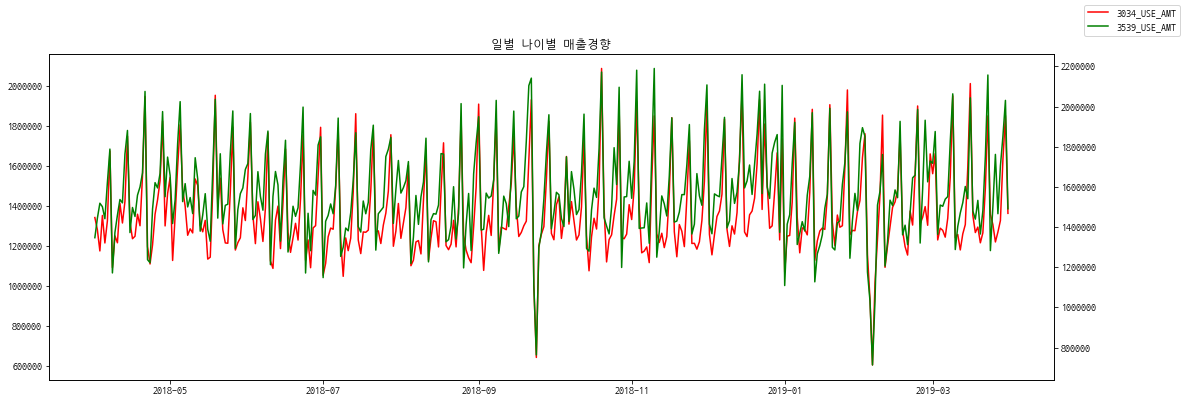

In [339]:
fig, ax1 = plt.subplots(figsize=(18,6))
ax2 = ax1.twinx()
ax1.plot(df_age.index, df_age['3034_USE_AMT'], 'r-')
ax2.plot(df_age.index, df_age['3539_USE_AMT'],'g-')
# ax1.legend('3034_USE_AMT')
# ax2.legend('3539_USE_AMT')
fig.legend(age30)
ax1.set_title('일별 나이별 매출경향')

In [186]:
age40 = [
#     '-25_USE_AMT', '2529_USE_AMT',
#          '3034_USE_AMT', '3539_USE_AMT',
            '4044_USE_AMT', '4549_USE_AMT', 
#          '5054_USE_AMT', '5559_USE_AMT',
#             '6064_USE_AMT', '65-_USE_AMT'
        ]

Text(0.5, 1.0, '일별 나이별 매출경향')

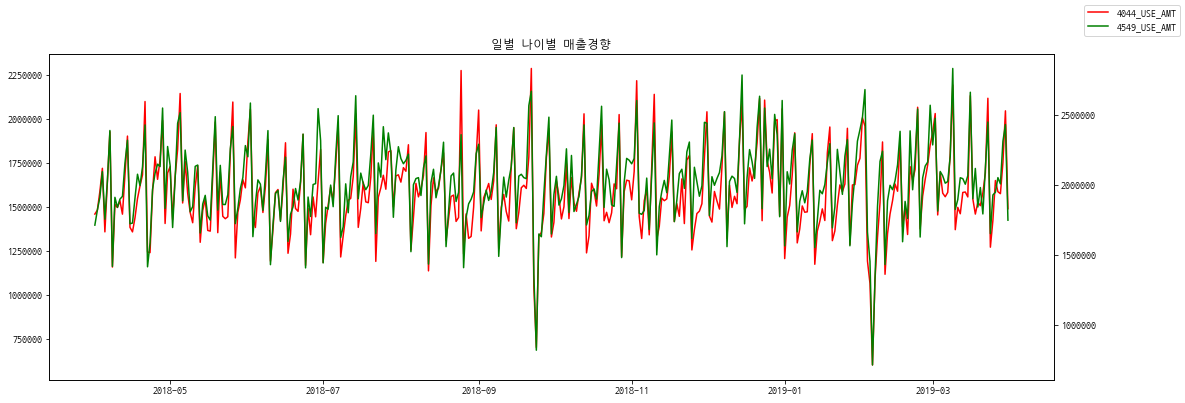

In [338]:
fig, ax1 = plt.subplots(figsize=(18,6))
ax2 = ax1.twinx()
ax1.plot(df_age.index, df_age['4044_USE_AMT'], 'r-')
ax2.plot(df_age.index, df_age['4549_USE_AMT'],'g-')
# ax1.legend('4044_USE_AMT')
# ax2.legend('4549_USE_AMT')
fig.legend(age40)
ax1.set_title('일별 나이별 매출경향')

In [188]:
age50 = [
#     '-25_USE_AMT', '2529_USE_AMT',
#          '3034_USE_AMT', '3539_USE_AMT',
#             '4044_USE_AMT', '4549_USE_AMT', 
         '5054_USE_AMT', '5559_USE_AMT',
#             '6064_USE_AMT', '65-_USE_AMT'
        ]

Text(0.5, 1.0, '일별 나이별 매출경향')

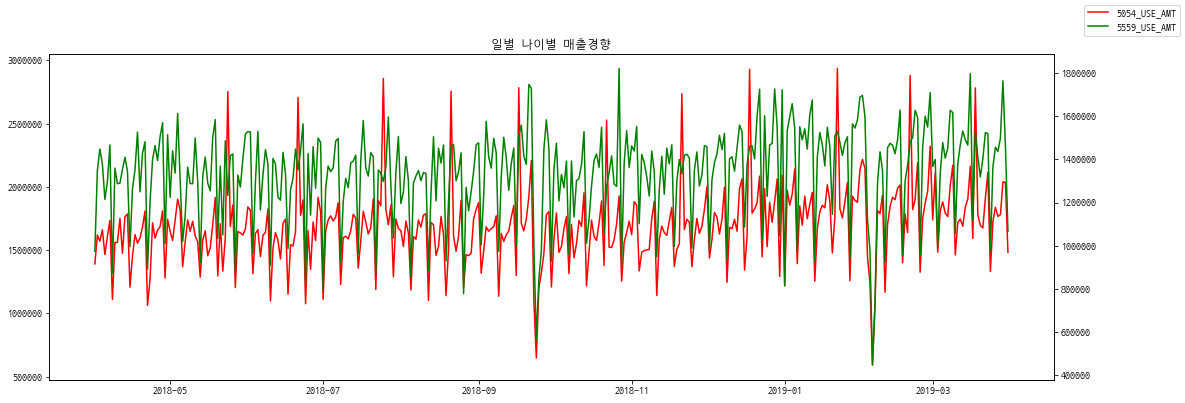

In [337]:
fig, ax1 = plt.subplots(figsize=(18,6))
ax2 = ax1.twinx()
ax1.plot(df_age.index, df_age['5054_USE_AMT'], 'r-')
ax2.plot(df_age.index, df_age['5559_USE_AMT'],'g-')
# ax1.legend('5054_USE_AMT')
# ax2.legend('5559_USE_AMT')
fig.legend(age50)
ax1.set_title('일별 나이별 매출경향')

In [329]:
age60 = [
#     '-25_USE_AMT', '2529_USE_AMT',
#          '3034_USE_AMT', '3539_USE_AMT',
#             '4044_USE_AMT', '4549_USE_AMT', 
#          '5054_USE_AMT', 
#     '5559_USE_AMT',
            '6064_USE_AMT', '65-_USE_AMT'
        ]

Text(0.5, 1.0, '일별 나이별 매출경향')

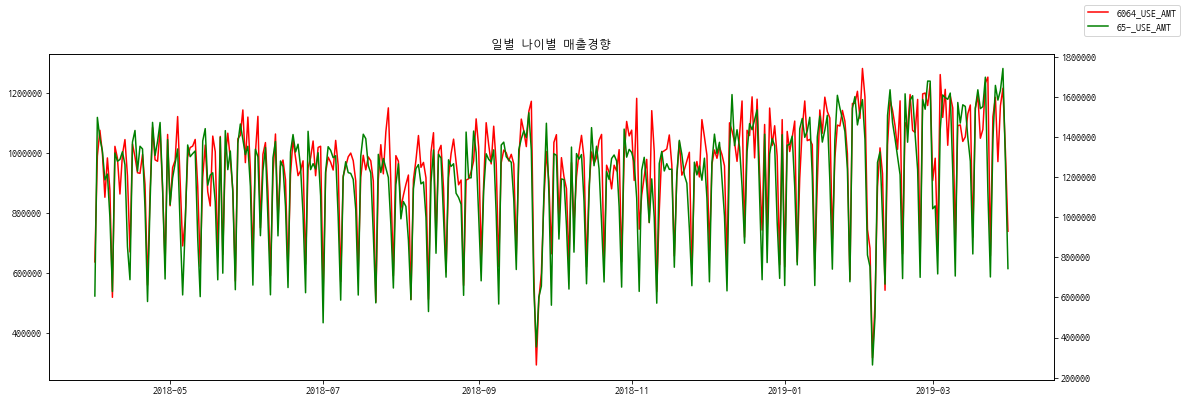

In [336]:
fig, ax1 = plt.subplots(figsize=(18,6))
ax2 = ax1.twinx()
ax1.plot(df_age.index, df_age['6064_USE_AMT'], 'r-')
ax2.plot(df_age.index, df_age['65-_USE_AMT'],'g-')
# ax3.plot(df_age.index, df_age['5559-USE_AMT'])
# ax1.legend('6064_USE_AMT')
# ax2.legend('65-_USE_AMT')
fig.legend(age60)
ax1.set_title('일별 나이별 매출경향')

In [192]:
df_asos_date = df_asos.groupby('DATE').sum().reset_index()
dateidx = pd.date_range('2018-04-01', '2019-03-31')
df_asos_date.index=dateidx
df_asos_date.drop('DATE', axis=1, inplace=True)

In [193]:
df_age_pm = df_age.merge(df_asos_date, left_on=df_age.index, right_on=df_asos_date.index).set_index('key_0')

In [194]:
df_news.index = dateidx
df_news.drop('DATE', axis=1, inplace=True)

In [195]:
df_age_pm = df_age_pm.merge(df_news, on=df_age_pm.index)

In [196]:
df_age_pm = df_age_pm.set_index('key_0')

In [197]:
df_age_pm.corr()[['pm10', 'pm25', 'CONTENT']]

pm10      pm25   CONTENT
-25_USE_AMT  -0.051710 -0.007339 -0.298694
2529_USE_AMT  0.036511  0.063490 -0.416642
3034_USE_AMT  0.019881  0.042442 -0.306688
3539_USE_AMT  0.008204  0.019542 -0.178913
4044_USE_AMT  0.057548  0.072794 -0.148475
4549_USE_AMT  0.083207  0.094258 -0.087354
5054_USE_AMT  0.188364  0.166868  0.133579
5559_USE_AMT  0.144524  0.124019  0.183451
6064_USE_AMT  0.216469  0.194152  0.311652
65-_USE_AMT   0.225288  0.194576  0.471155
pm10          1.000000  0.942305  0.352129
pm25          0.942305  1.000000  0.304630
CONTENT       0.352129  0.304630  1.000000

# 10대별로 만들기

In [198]:
df_age.head()

-25_USE_AMT  2529_USE_AMT  3034_USE_AMT  3539_USE_AMT  \
2018-04-01      1001645       1727526       1344238       1347351   
2018-04-02       991466       1372664       1283543       1443964   
2018-04-03       884129       1344864       1177149       1519086   
2018-04-04       901878       1423431       1354604       1501900   
2018-04-05       900279       1271686       1217059       1441838   

            4044_USE_AMT  4549_USE_AMT  5054_USE_AMT  5559_USE_AMT  \
2018-04-01       1459798       1716170       1391392        973890   
2018-04-02       1481891       1823554       1619576       1348383   
2018-04-03       1587894       1914571       1570510       1448327   
2018-04-04       1719296       2097936       1661213       1378502   
2018-04-05       1358891       1758489       1464636       1214528   

            6064_USE_AMT  65-_USE_AMT  
2018-04-01        638395       607213  
2018-04-02        990666      1498193  
2018-04-03       1076957      1394583  
2018-04-04       1001741      1331388  
2018-04-05        853737      1186859

In [199]:
df_age['age20'] = [df_age[['-25_USE_AMT', '2529_USE_AMT']].loc[i].sum() for i in df_age.index]

In [200]:
df_age['age30'] = [df_age[['3034_USE_AMT', '3539_USE_AMT']].loc[i].sum() for i in df_age.index]

In [201]:
df_age['age40'] = [df_age[['4044_USE_AMT', '4549_USE_AMT']].loc[i].sum() for i in df_age.index]

In [202]:
df_age['age50'] = [df_age[['5054_USE_AMT', '5559_USE_AMT']].loc[i].sum() for i in df_age.index]

# Load asos

In [203]:
df_asos_no15 = pd.read_csv('./data/innovation/asos/노원구/V10O1611104.csv')  # 상계 6, 7동


In [204]:
df_asos_no15['DATE'] = [str(df_asos_no15.tm[i])[:8] for i in range(len(df_asos_no15))]

In [205]:
drop_cols = ['serial', 'flag', 'co2', 'vocs', 'noise', 'temp', 'humi', 'Unnamed: 10', 'tm']
df_asos_no15.drop(drop_cols, axis=1, inplace=True)

In [207]:
df_asos_no15 = df_asos_no15.groupby('DATE').mean()
df_asos_no15 = df_asos_no15.reset_index()

In [208]:
df_asos_no15['GU_NM']=['노원구']*len(df_asos_no15)

In [209]:
df_asos_jong13 = pd.read_csv('./data/innovation/asos/종로구/V10O1611887.csv')  # 명동


In [210]:
df_asos_jong13['DATE'] = [str(df_asos_jong13.tm[i])[:8] for i in range(len(df_asos_jong13))]

In [211]:
drop_cols = ['serial', 'flag', 'co2', 'vocs', 'noise', 'temp', 'humi', 'Unnamed: 10', 'tm']
df_asos_jong13.drop(drop_cols, axis=1, inplace=True)

In [212]:
df_asos_jong13 = df_asos_jong13.groupby('DATE').mean()
df_asos_jong13 = df_asos_jong13.reset_index()

In [213]:
df_asos_jong13['GU_NM']=['종로구']*len(df_asos_jong13)

In [214]:
df_asos = pd.concat([df_asos_no15, df_asos_jong13]).groupby(['DATE', 'GU_NM']).sum().reset_index()

In [215]:
df_asos.head()

DATE GU_NM       pm10       pm25
0  20180401   노원구  68.328472  35.256944
1  20180401   종로구  84.070139  43.877083
2  20180402   노원구  72.005556  29.909028
3  20180402   종로구  72.274306  30.051389
4  20180403   노원구  72.838194  24.295833

In [216]:
df_asos['DATE'] = df_asos.DATE.astype(int)

# Load df_news

In [217]:
df_news = pd.read_csv('./data/innovation/df_news.csv')

In [218]:
dateidx = pd.date_range('2018-04-01', '2019-03-31')
df_asos = df_asos.groupby('DATE').mean()
df_asos.index = dateidx
df_news.index = dateidx

In [219]:
df_news.drop('DATE', axis=1, inplace=True)

In [220]:
df_total = df_age.merge(df_news, on=df_news.index).set_index('key_0')

In [221]:
df_total = df_total.merge(df_asos, on=df_asos.index).set_index('key_0')

In [222]:
df_total = df_total[['CONTENT', 'pm10', 'pm25', 'age20', 'age30', 'age40', 'age50']]

In [223]:
df_total.head()

CONTENT       pm10       pm25    age20    age30    age40    age50
key_0                                                                        
2018-04-01      515  76.199306  39.567014  2729171  2691589  3175968  2365282
2018-04-02      888  72.139931  29.980208  2364130  2727507  3305445  2967959
2018-04-03      856  69.500347  21.887153  2228993  2696235  3502465  3018837
2018-04-04      893  11.174306   4.180903  2325309  2856504  3817232  3039715
2018-04-05      864   3.871181  -0.716667  2171965  2658897  3117380  2679164

# 나이대별 경향성보기

# 상관계수보기

### 정규화하기

In [224]:
df_total_scale = (df_total - df_total.mean())/df_total.std()

In [225]:
df_corr = df_total_scale.corr().loc[['CONTENT', 'pm10', 'pm25']][['age20', 'age30', 'age40', 'age50']]

In [226]:
df_corr['age20_cross'] = [float(np.correlate(df_total['age20'], df_total['CONTENT'])),
float(np.correlate(df_total['age20'], df_total['pm10'])),
float(np.correlate(df_total['age20'], df_total['pm25']))]

In [227]:
df_corr['age30_cross'] = [float(np.correlate(df_total['age30'], df_total['CONTENT'])),
float(np.correlate(df_total['age30'], df_total['pm10'])),
float(np.correlate(df_total['age30'], df_total['pm25']))]

In [228]:
df_corr['age40_cross'] = [float(np.correlate(df_total['age40'], df_total['CONTENT'])),
float(np.correlate(df_total['age40'], df_total['pm10'])),
float(np.correlate(df_total['age40'], df_total['pm25']))]

In [229]:
df_corr['age50_cross'] = [float(np.correlate(df_total['age50'], df_total['CONTENT'])),
float(np.correlate(df_total['age50'], df_total['pm10'])),
float(np.correlate(df_total['age50'], df_total['pm25']))]

In [230]:
df_corr

age20     age30     age40     age50   age20_cross   age30_cross  \
CONTENT -0.406265 -0.248165 -0.117275  0.165078  4.756364e+11  5.459145e+11   
pm10     0.006335  0.014310  0.072997  0.182914  5.844981e+10  6.616587e+10   
pm25     0.042047  0.031611  0.086201  0.160288  3.504361e+10  3.957063e+10   

          age40_cross   age50_cross  
CONTENT  6.758737e+11  5.797544e+11  
pm10     8.150237e+10  6.929038e+10  
pm25     4.876048e+10  4.135375e+10

<BarContainer object of 4 artists>

C:\Users\JuhoSon\Miniconda3\envs\2019BigC\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JuhoSon\Miniconda3\envs\2019BigC\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


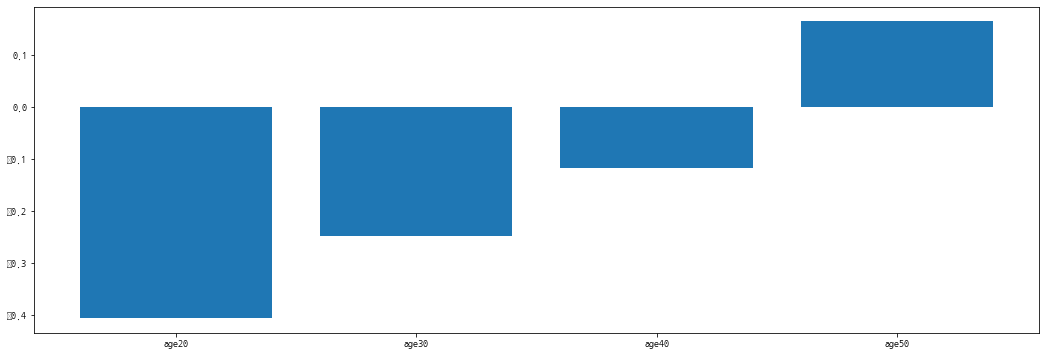

In [231]:
plt.figure(figsize=(18,6))
plt.bar(['age20', 'age30', 'age40', 'age50'], 
        df_corr.loc['CONTENT'][['age20', 'age30', 'age40', 'age50']].values)

<BarContainer object of 4 artists>

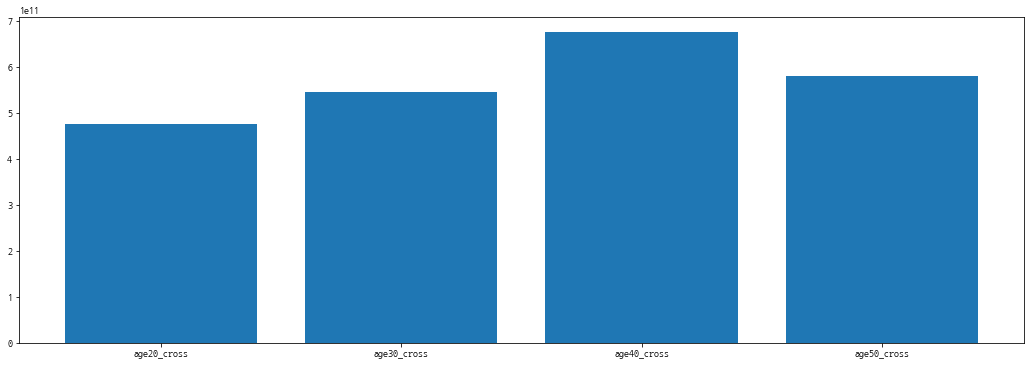

In [232]:
plt.figure(figsize=(18,6))
plt.bar(['age20_cross', 'age30_cross', 'age40_cross', 'age50_cross'],
        df_corr.loc['CONTENT'][['age20_cross', 'age30_cross', 'age40_cross', 'age50_cross']].values)

In [233]:
age20_cross = np.correlate(df_total_scale['age20'], df_total_scale['CONTENT'], mode='same')
age30_cross = np.correlate(df_total_scale['age30'], df_total_scale['CONTENT'], mode='same')
age40_cross = np.correlate(df_total_scale['age40'], df_total_scale['CONTENT'], mode='same')
age50_cross = np.correlate(df_total_scale['age50'], df_total_scale['CONTENT'], mode='same')

In [234]:
df_cross = pd.DataFrame(age20_cross, columns=['age20_cross'])
df_cross['age30_cross'] = age30_cross
df_cross['age40_cross'] = age40_cross
df_cross['age50_cross'] = age50_cross

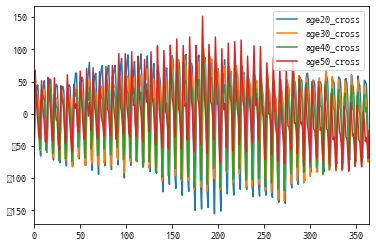

In [235]:
df_cross.plot()

# 경향성보기

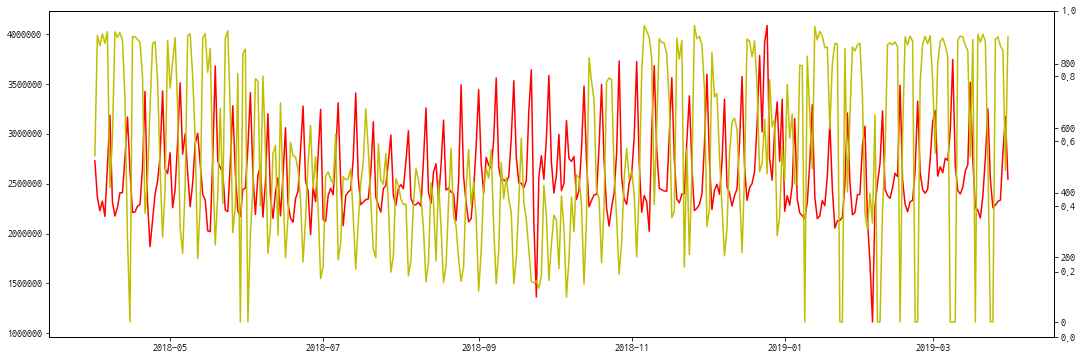

In [236]:
fig, ax0 = plt.subplots(figsize=(18,6))
ax1 = ax0.twinx()
ax2 = ax0.twinx()
ax0.plot(df_total.index, df_total['age20'], 'r-')
ax2.plot(df_total.index, df_total['CONTENT'], 'y-')

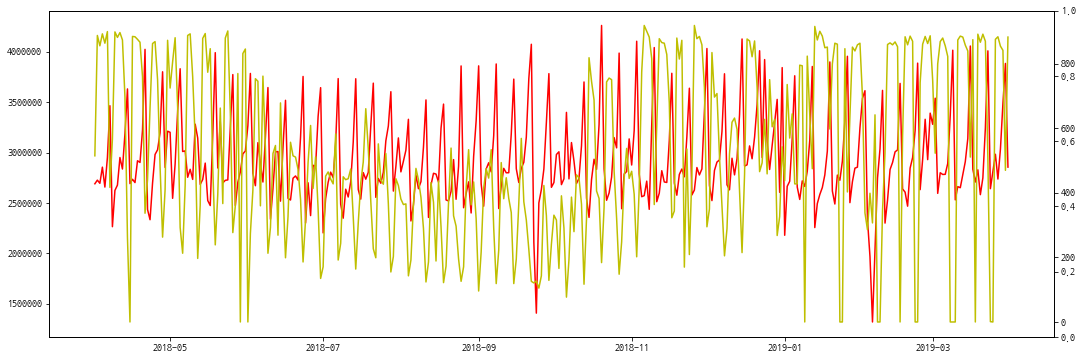

In [237]:
fig, ax0 = plt.subplots(figsize=(18,6))
ax1 = ax0.twinx()
ax2 = ax0.twinx()
ax0.plot(df_total.index, df_total['age30'], 'r-')
ax2.plot(df_total.index, df_total['CONTENT'], 'y-')

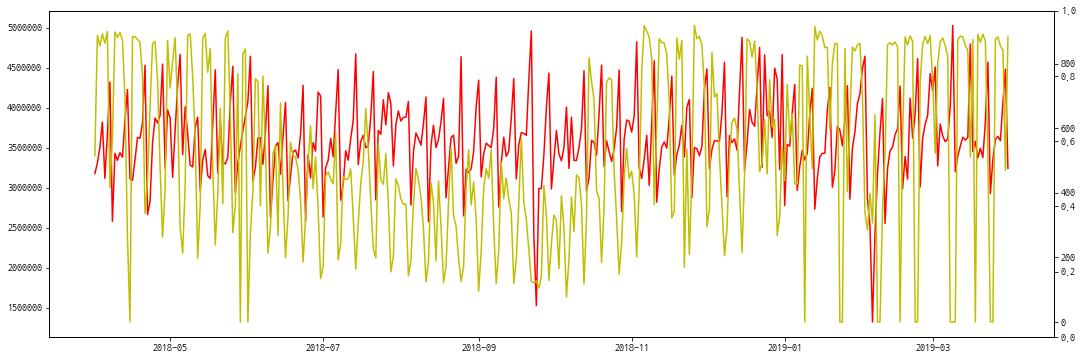

In [238]:
fig, ax0 = plt.subplots(figsize=(18,6))
ax1 = ax0.twinx()
ax2 = ax0.twinx()
ax0.plot(df_total.index, df_total['age40'], 'r-')
ax2.plot(df_total.index, df_total['CONTENT'], 'y-')

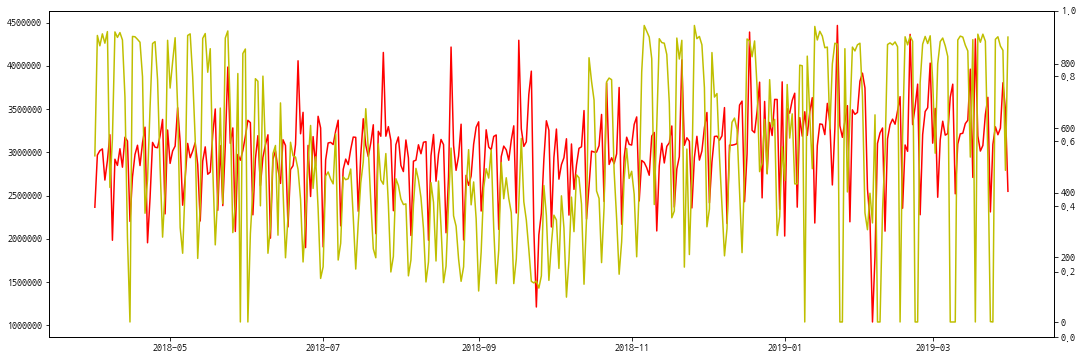

In [239]:
fig, ax0 = plt.subplots(figsize=(18,6))
ax1 = ax0.twinx()
ax2 = ax0.twinx()
ax0.plot(df_total.index, df_total['age50'], 'r-')
ax2.plot(df_total.index, df_total['CONTENT'], 'y-')

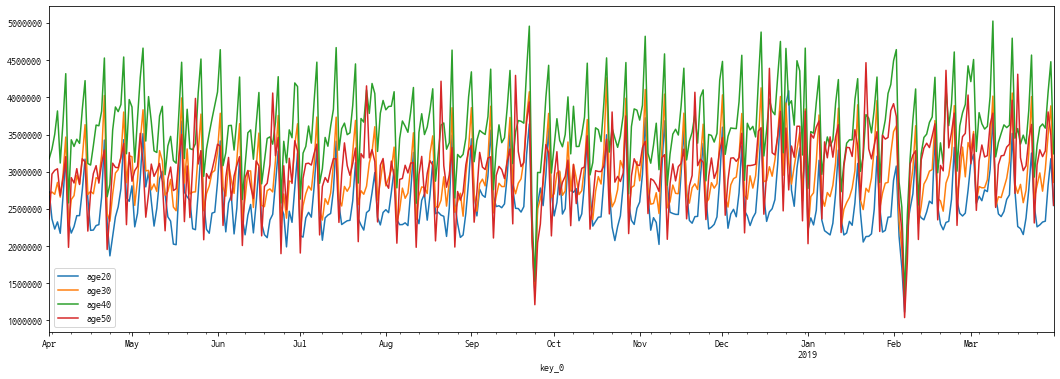

In [240]:
df_total[['age20', 'age30', 'age40', 'age50']].plot(figsize=(18,6))

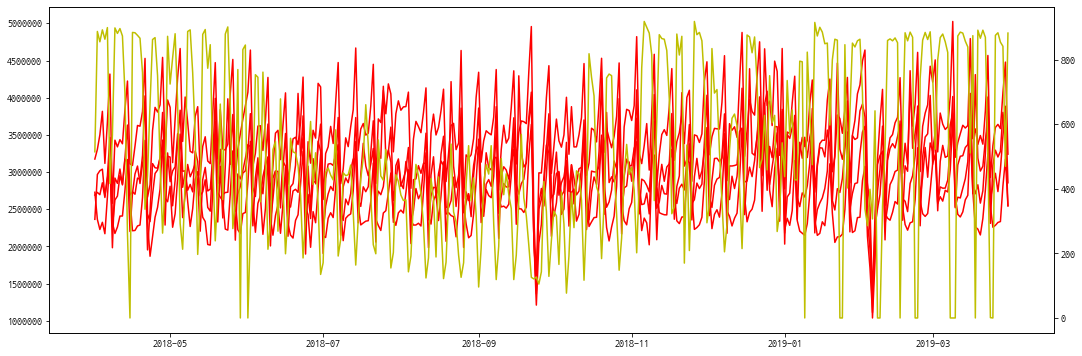

In [241]:
fig, ax0 = plt.subplots(figsize=(18,6))
ax1 = ax0.twinx()
ax0.plot(df_total.index, df_total[['age20', 'age30', 'age40', 'age50']], 'r-')
ax1.plot(df_total.index, df_total[['CONTENT']], 'y-')

In [243]:
df_total_scale = (df_total - df_total.mean())/df_total.std()

In [244]:
df_total_scale.head()

CONTENT      pm10      pm25     age20     age30     age40  \
key_0                                                                    
2018-04-01 -0.008420  0.327425  0.094120  0.288361 -0.571975 -0.835389   
2018-04-02  1.364451  0.237925 -0.209637 -0.582615 -0.492500 -0.587149   
2018-04-03  1.246671  0.179728 -0.466064 -0.905048 -0.561694 -0.209411   
2018-04-04  1.382854 -1.106231 -1.027085 -0.675241 -0.207073  0.394079   
2018-04-05  1.276116 -1.267249 -1.182263 -1.041115 -0.644311 -0.947718   

               age50  
key_0                 
2018-04-01 -1.346273  
2018-04-02 -0.121981  
2018-04-03 -0.018626  
2018-04-04  0.023786  
2018-04-05 -0.708646

In [245]:
df_corr = df_total_scale.corr().loc[['CONTENT', 'pm10', 'pm25']][['age20', 'age30', 'age40', 'age50']]

In [246]:
max(np.correlate(df_total_scale['age20'], df_total_scale['CONTENT'],mode='full')/len(df_total_scale))

0.2540171696948893

In [247]:
df_corr['age20_cross'] = [max(np.correlate(df_total_scale['age20'], df_total_scale['CONTENT'], mode='full'))/len(df_total_scale),
max(np.correlate(df_total_scale['age20'], df_total_scale['pm10'], mode='full'))/len(df_total_scale),
max(np.correlate(df_total_scale['age20'], df_total_scale['pm25'], mode='full'))/len(df_total_scale)]

df_corr['age30_cross'] = [max(np.correlate(df_total_scale['age30'], df_total_scale['CONTENT'], mode='full'))/len(df_total_scale),
max(np.correlate(df_total_scale['age30'], df_total_scale['pm10'], mode='full'))/len(df_total_scale),
max(np.correlate(df_total_scale['age30'], df_total_scale['pm25'], mode='full'))/len(df_total_scale)]

df_corr['age40_cross'] = [max(np.correlate(df_total_scale['age40'], df_total_scale['CONTENT'], mode='full'))/len(df_total_scale),
max(np.correlate(df_total_scale['age40'], df_total_scale['pm10'], mode='full'))/len(df_total_scale),
max(np.correlate(df_total_scale['age40'], df_total_scale['pm25'], mode='full'))/len(df_total_scale)]

df_corr['age50_cross'] = [max(np.correlate(df_total_scale['age50'], df_total_scale['CONTENT'], mode='full'))/len(df_total_scale),
max(np.correlate(df_total_scale['age50'], df_total_scale['pm10'], mode='full'))/len(df_total_scale),
max(np.correlate(df_total_scale['age50'], df_total_scale['pm25'], mode='full'))/len(df_total_scale)]


In [248]:
df_corr['age20_cross_min'] = [min(np.correlate(df_total_scale['age20'], df_total_scale['CONTENT'], mode='full'))/len(df_total_scale),
min(np.correlate(df_total_scale['age20'], df_total_scale['pm10'], mode='full'))/len(df_total_scale),
min(np.correlate(df_total_scale['age20'], df_total_scale['pm25'], mode='full'))/len(df_total_scale)]

df_corr['age30_cross_min'] = [min(np.correlate(df_total_scale['age30'], df_total_scale['CONTENT'], mode='full'))/len(df_total_scale),
min(np.correlate(df_total_scale['age30'], df_total_scale['pm10'], mode='full'))/len(df_total_scale),
min(np.correlate(df_total_scale['age30'], df_total_scale['pm25'], mode='full'))/len(df_total_scale)]

df_corr['age40_cross_min'] = [min(np.correlate(df_total_scale['age40'], df_total_scale['CONTENT'], mode='full'))/len(df_total_scale),
min(np.correlate(df_total_scale['age40'], df_total_scale['pm10'], mode='full'))/len(df_total_scale),
min(np.correlate(df_total_scale['age40'], df_total_scale['pm25'], mode='full'))/len(df_total_scale)]

df_corr['age50_cross_min'] = [min(np.correlate(df_total_scale['age50'], df_total_scale['CONTENT'], mode='full'))/len(df_total_scale),
min(np.correlate(df_total_scale['age50'], df_total_scale['pm10'], mode='full'))/len(df_total_scale),
min(np.correlate(df_total_scale['age50'], df_total_scale['pm25'], mode='full'))/len(df_total_scale)]


In [249]:
df_corr

age20     age30     age40     age50  age20_cross  age30_cross  \
CONTENT -0.406265 -0.248165 -0.117275  0.165078     0.254017     0.279878   
pm10     0.006335  0.014310  0.072997  0.182914     0.220172     0.151229   
pm25     0.042047  0.031611  0.086201  0.160288     0.245013     0.142041   

         age40_cross  age50_cross  age20_cross_min  age30_cross_min  \
CONTENT     0.257972     0.414758        -0.426259        -0.369854   
pm10        0.138588     0.206236        -0.138474        -0.139627   
pm25        0.152682     0.209012        -0.147603        -0.135941   

         age40_cross_min  age50_cross_min  
CONTENT        -0.328177        -0.244876  
pm10           -0.148197        -0.146956  
pm25           -0.133491        -0.152954

<BarContainer object of 4 artists>

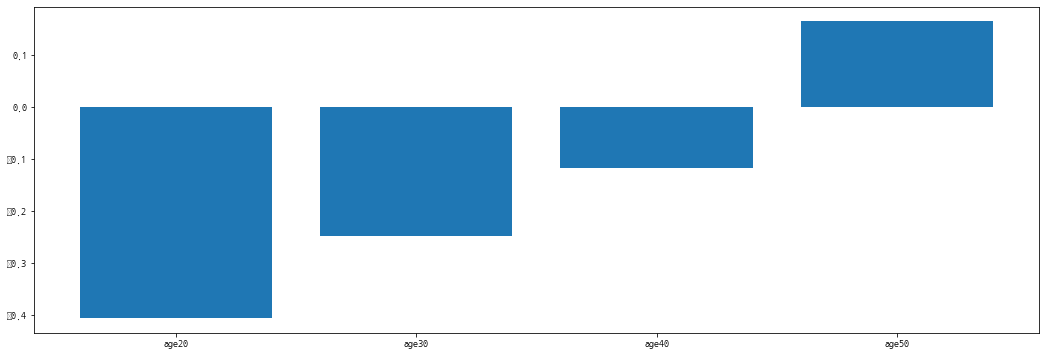

In [250]:
plt.figure(figsize=(18,6))
plt.bar(['age20', 'age30', 'age40', 'age50'], 
        df_corr.loc['CONTENT'][['age20', 'age30', 'age40', 'age50']].values)

<BarContainer object of 4 artists>

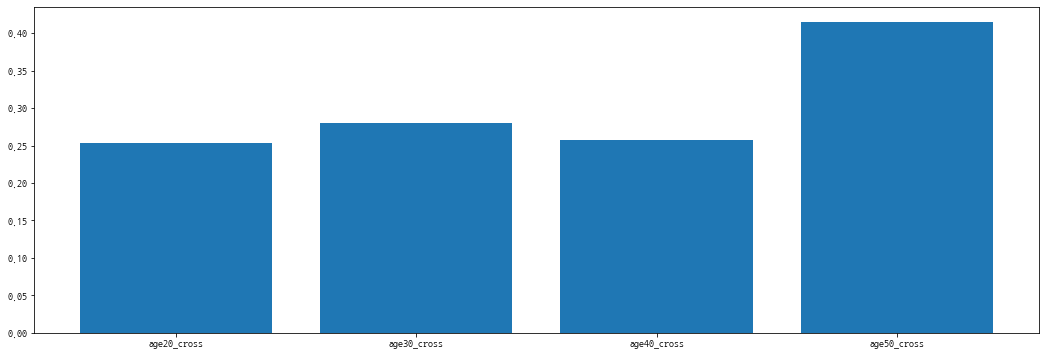

In [251]:
plt.figure(figsize=(18,6))
plt.bar(['age20_cross', 'age30_cross', 'age40_cross', 'age50_cross'],
        df_corr.loc['CONTENT'][['age20_cross', 'age30_cross', 'age40_cross', 'age50_cross']].values)

<BarContainer object of 4 artists>

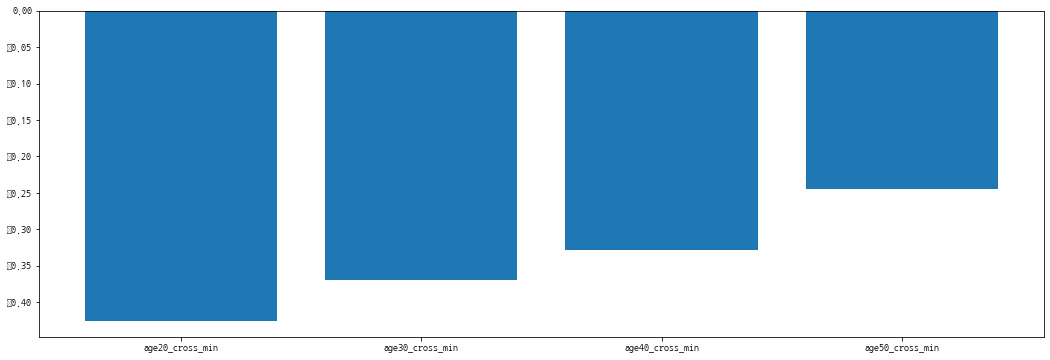

In [252]:
plt.figure(figsize=(18,6))
plt.bar(['age20_cross_min', 'age30_cross_min', 'age40_cross_min', 'age50_cross_min'],
        df_corr.loc['CONTENT'][['age20_cross_min', 'age30_cross_min', 'age40_cross_min', 'age50_cross_min']].values)

* 20대가 미세먼지에 민감하게 반응하는 반면 50대는 둔감하게 반응한다.

# 1차 Merge 190812월 일별 나이별업종별 데이터

In [342]:
df_shinhan.head()

DATE  GU_CD DONG_CD  MCT_CAT_CD SEX_CD  AGE_CD  USE_CNT  USE_AMT GU_NM  \
0  20180401    110  110515          21      F      30        4      180   종로구   
1  20180401    110  110515          21      F      55        4       22   종로구   
2  20180401    110  110515          21      M      20       35      184   종로구   
3  20180401    110  110515          21      M      25       70      425   종로구   
4  20180401    110  110515          21      M      30       18       82   종로구   

  DONG_NM  
0   청운효자동  
1   청운효자동  
2   청운효자동  
3   청운효자동  
4   청운효자동

In [281]:
df_merge = df_shinhan.groupby(['DATE', 'MCT_CAT_CD', 'AGE_CD']).sum()

In [282]:
df_merge = pd.DataFrame(df_merge.USE_AMT)

In [283]:
df_merge = df_merge.unstack()

In [285]:
df_merge.columns = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65]

In [291]:
df_merge['age20'] = df_merge[20]+df_merge[25]
df_merge['age30'] = df_merge[30]+df_merge[35]
df_merge['age40'] = df_merge[40]+df_merge[45]
df_merge['age50'] = df_merge[50]+df_merge[55]

In [293]:
df_merge.drop([20, 25, 30, 35, 40, 45, 50, 55, 60, 65], axis=1, inplace=True)

In [296]:
df_merge = df_merge.unstack()

In [309]:
AMT_list = ['숙박_USE_AMT', '레저용품_USE_AMT','레저업소_USE_AMT', '문화취미_USE_AMT', '가구_USE_AMT', '전기_USE_AMT',
                  '주방_USE_AMT', '연료_USE_AMT', '광학_USE_AMT', '가전_USE_AMT', '유통업_USE_AMT',
                  '의복_USE_AMT', '직물_USE_AMT', '신변잡화_USE_AMT','서적문구_USE_AMT', '사무통신_USE_AMT',
                  '자동차판매_USE_AMT', '자동차정비_USE_AMT', '의료기관_USE_AMT', '보건위생_USE_AMT', '요식업소_USE_AMT',
                  '음료식품_USE_AMT', '수리서비스_USE_AMT']
age_list = ['age20', 'age30', 'age40', 'age50']

In [310]:
cols_name_list = [i+j for i in age_list for j in AMT_list]

In [313]:
df_merge.columns = cols_name_list

In [315]:
df_merge.head()

age20숙박_USE_AMT  age20레저용품_USE_AMT  age20레저업소_USE_AMT  \
DATE                                                              
20180401          50633.0            23577.0            83458.0   
20180402          12474.0            14364.0           109871.0   
20180403          18253.0            12683.0            73473.0   
20180404          13973.0            17282.0            89406.0   
20180405          16187.0            10839.0            68984.0   

          age20문화취미_USE_AMT  age20가구_USE_AMT  age20전기_USE_AMT  \
DATE                                                            
20180401            38248.0          12733.0              NaN   
20180402            18839.0              NaN              NaN   
20180403            13711.0           4503.0              NaN   
20180404            14673.0          12279.0              NaN   
20180405            19017.0              NaN              NaN   

          age20주방_USE_AMT  age20연료_USE_AMT  age20광학_USE_AMT  age20가전_USE_AMT  \
DATE                                                                           
20180401              NaN          16562.0           5432.0          15718.0   
20180402              NaN          19320.0           3010.0           4619.0   
20180403            166.0          16341.0           3857.0           4942.0   
20180404            340.0          13446.0           6064.0           7817.0   
20180405            470.0          13330.0           2280.0           8291.0   

          age20유통업_USE_AMT  age20의복_USE_AMT  age20직물_USE_AMT  \
DATE                                                           
20180401          575036.0          64927.0           6850.0   
20180402          485528.0          52090.0           3760.0   
20180403          425543.0          40889.0           2415.0   
20180404          482126.0          44130.0           3863.0   
20180405          448313.0          43804.0           2446.0   

          age20신변잡화_USE_AMT  age20서적문구_USE_AMT  ...  age50광학_USE_AMT  \
DATE                                            ...                    
20180401            65067.0           219365.0  ...           6433.0   
20180402            38559.0           226157.0  ...           1695.0   
20180403            18942.0           151770.0  ...           1776.0   
20180404            30816.0           161780.0  ...           2013.0   
20180405            29335.0           168313.0  ...           1854.0   

          age50가전_USE_AMT  age50유통업_USE_AMT  age50의복_USE_AMT  age50직물_USE_AMT  \
DATE                                                                            
20180401          17140.0          875445.0          63078.0           8508.0   
20180402          18477.0          635699.0          83099.0          25021.0   
20180403         112402.0          667841.0          71489.0          16363.0   
20180404          40974.0          760904.0          52791.0          32532.0   
20180405          12071.0          602244.0          37625.0          13844.0   

          age50신변잡화_USE_AMT  age50서적문구_USE_AMT  age50사무통신_USE_AMT  \
DATE                                                                
20180401            51133.0           120968.0                NaN   
20180402            35627.0           132143.0             7661.0   
20180403            41425.0            92400.0             1656.0   
20180404            46835.0            95321.0             2860.0   
20180405            27272.0            98797.0             2782.0   

          age50자동차판매_USE_AMT  age50자동차정비_USE_AMT  age50의료기관_USE_AMT  \
DATE                                                                  
20180401                 NaN              4944.0           126499.0   
20180402              5470.0             56741.0           899924.0   
20180403                 NaN             29768.0           772657.0   
20180404               500.0             50481.0           787337.0   
20180405                 NaN             21807.0           776466.0   

          age50보건위생

In [316]:
df_merge.to_csv('./data/innovation/df_shinhan.csv', index=False)

# 2차 Merge 190813화 노원구만

In [17]:
df_merge = df_shinhan.groupby(['DATE', 'GU_NM', 'MCT_CAT_CD', 'AGE_CD']).sum()

In [18]:
df_merge = pd.DataFrame(df_merge.USE_CNT)

* 나이를 columns으로 

In [19]:
df_merge = df_merge.unstack()

In [20]:
df_merge.columns = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65]

In [21]:
df_merge['age20'] = df_merge[20]+df_merge[25]
df_merge['age30'] = df_merge[30]+df_merge[35]
df_merge['age40'] = df_merge[40]+df_merge[45]
df_merge['age50'] = df_merge[50]+df_merge[55]

In [22]:
df_merge.drop([20, 25, 30, 35, 40, 45, 50, 55, 60, 65], axis=1, inplace=True)

* 업종을 column으로

In [23]:
df_merge = df_merge.unstack()

* 노원구만

In [24]:
nowon_idx = [(df_merge.index[i][0], '노원구') for i in range(len(df_merge)) if i % 2 ==0]

In [25]:
df_merge = df_merge.loc[nowon_idx]

In [26]:
df_merge = df_merge.unstack()

In [31]:
AMT_list = ['숙박', '레저용품','레저업소', '문화취미', '가구', '전기',
                  '주방', '연료', '광학', '가전', '유통업',
                  '의복', '직물', '신변잡화','서적문구', '사무통신',
                  '자동차판매', '자동차정비', '의료기관', '보건위생', '요식업소',
                  '음료식품', '수리서비스']
age_list = ['age20', 'age30', 'age40', 'age50']

In [32]:
cols_name_list = [i+j for i in age_list for j in AMT_list]

In [33]:
df_merge.columns = cols_name_list

In [35]:
df_merge.to_csv('./data/innovation/create/df_shinhan_nowon.csv', index=False)

# 매출추이

In [111]:
time_4_nowon = df_total_nowon

In [122]:
df_news = df_news.set_index('DATE')

In [123]:
df_viz2 = time_4_nowon.merge(df_news, on=df_news.index)

In [133]:
df_viz2.index = pd.date_range('2018-04-01', '2019-03-31')

Text(0, 0.5, '매출금액')

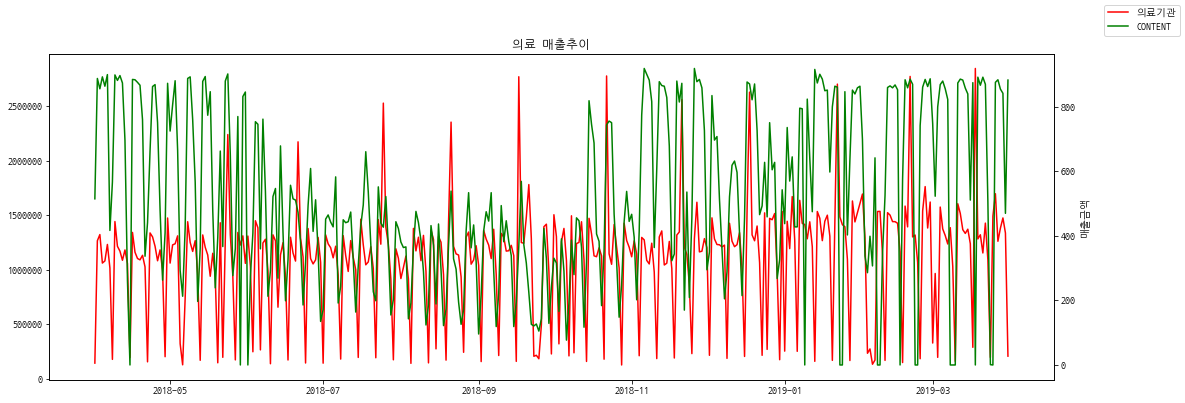

In [135]:
fig, ax0 = plt.subplots(figsize=(18,6))
ax1 = ax0.twinx()
ax0.plot(df_viz2.index, df_viz2['의료기관_USE_AMT'], 'r-')
ax1.plot(df_viz2.index, df_viz2['CONTENT'], 'g-')
fig.legend(['의료기관', 'CONTENT'])
plt.title('의료 매출추이')
plt.xlabel('년월일')
plt.ylabel('매출금액')

In [116]:
pd.DataFrame(time_4_nowon.loc[time_4_nowon['의료기관_USE_AMT']>=2000000]['의료기관_USE_AMT'])  # 200만건 넘게 사용된 날짜

의료기관_USE_AMT
2018-05-24     2242177.0
2018-06-21     2175182.0
2018-07-25     2530286.0
2018-08-21     2356166.0
2018-09-17     2772235.0
2018-10-22     2779381.0
2018-11-21     2561738.0
2018-12-18     2631137.0
2019-01-22     2704593.0
2019-02-20     2775004.0
2019-03-18     2848159.0

# 3차 Merge 190902월 일별 업종별 데이터

In [8]:
df_shinhan.head()

DATE  GU_CD  DONG_CD  MCT_CAT_CD SEX_CD  AGE_CD  USE_CNT  USE_AMT
0  20180401    110      515          21      F      30        4      180
1  20180401    110      515          21      F      55        4       22
2  20180401    110      515          21      M      20       35      184
3  20180401    110      515          21      M      25       70      425
4  20180401    110      515          21      M      30       18       82

In [9]:
df_merge = df_shinhan.groupby(['DATE', 'MCT_CAT_CD']).sum()

In [10]:
df_merge = pd.DataFrame(df_merge.USE_AMT)

In [11]:
df_merge = df_merge.unstack()

In [12]:
df_merge.head()

USE_AMT                                                          \
MCT_CAT_CD        10        20        21        22       30      31       32   
DATE                                                                           
20180401    171130.0  160087.0  237997.0  111126.0  21890.0    48.0   4859.0   
20180402     93369.0  168191.0  387279.0   62209.0   3449.0  5245.0  11104.0   
20180403    116075.0  234052.0  332154.0   66058.0  10749.0  4551.0  20670.0   
20180404     84254.0  143845.0  302737.0   90335.0  15254.0  1962.0   7101.0   
20180405    106643.0  179423.0  232636.0   74715.0  13973.0  2092.0   8696.0   

                                                                        \
MCT_CAT_CD        33       34        35         40        42        43   
DATE                                                                     
20180401    385830.0  20223.0   88453.0  3864160.0  332495.0   28422.0   
20180402    438545.0   9887.0  109716.0  2853410.0  350230.0   69536.0   
20180403    392441.0  10826.0  218002.0  2913978.0  275566.0  134934.0   
20180404    413563.0  21374.0  128609.0  3612444.0  297502.0  105279.0   
20180405    387197.0  10605.0  140680.0  2705151.0  192196.0   36356.0   

                                                                       \
MCT_CAT_CD        44        50       52       60        62         70   
DATE                                                                    
20180401    234150.0  877765.0   6164.0      NaN   58723.0   480860.0   
20180402    275054.0  660377.0  34680.0  10784.0  182590.0  3611520.0   
20180403    191815.0  570384.0  14012.0  42376.0  107212.0  3492940.0   
20180404    172254.0  588266.0  16757.0   1770.0  133178.0  3238880.0   
20180405    150335.0  535284.0  23751.0   8384.0   92224.0  3121823.0   

                                                    
MCT_CAT_CD        71         80        81       92  
DATE                                                
20180401    414979.0  4426221.0  268343.0  13693.0  
20180402    356803.0  3724023.0  384269.0  51630.0  
20180403    336282.0  4065049.0  316704.0  51240.0  
20180404    372022.0  4264059.0  304194.0  56250.0  
20180405    351359.0  3971589.0  297745.0  25145.0

In [13]:
AMT_list = ['숙박_USE_AMT', '레저용품_USE_AMT','레저업소_USE_AMT', '문화취미_USE_AMT', '가구_USE_AMT', '전기_USE_AMT',
                  '주방_USE_AMT', '연료_USE_AMT', '광학_USE_AMT', '가전_USE_AMT', '유통업_USE_AMT',
                  '의복_USE_AMT', '직물_USE_AMT', '신변잡화_USE_AMT','서적문구_USE_AMT', '사무통신_USE_AMT',
                  '자동차판매_USE_AMT', '자동차정비_USE_AMT', '의료기관_USE_AMT', '보건위생_USE_AMT', '요식업소_USE_AMT',
                  '음료식품_USE_AMT', '수리서비스_USE_AMT']

In [15]:
df_merge.columns = AMT_list

In [16]:
df_merge.head()

숙박_USE_AMT  레저용품_USE_AMT  레저업소_USE_AMT  문화취미_USE_AMT  가구_USE_AMT  \
DATE                                                                         
20180401    171130.0      160087.0      237997.0      111126.0     21890.0   
20180402     93369.0      168191.0      387279.0       62209.0      3449.0   
20180403    116075.0      234052.0      332154.0       66058.0     10749.0   
20180404     84254.0      143845.0      302737.0       90335.0     15254.0   
20180405    106643.0      179423.0      232636.0       74715.0     13973.0   

          전기_USE_AMT  주방_USE_AMT  연료_USE_AMT  광학_USE_AMT  가전_USE_AMT  \
DATE                                                                   
20180401        48.0      4859.0    385830.0     20223.0     88453.0   
20180402      5245.0     11104.0    438545.0      9887.0    109716.0   
20180403      4551.0     20670.0    392441.0     10826.0    218002.0   
20180404      1962.0      7101.0    413563.0     21374.0    128609.0   
20180405      2092.0      8696.0    387197.0     10605.0    140680.0   

          유통업_USE_AMT  의복_USE_AMT  직물_USE_AMT  신변잡화_USE_AMT  서적문구_USE_AMT  \
DATE                                                                        
20180401    3864160.0    332495.0     28422.0      234150.0      877765.0   
20180402    2853410.0    350230.0     69536.0      275054.0      660377.0   
20180403    2913978.0    275566.0    134934.0      191815.0      570384.0   
20180404    3612444.0    297502.0    105279.0      172254.0      588266.0   
20180405    2705151.0    192196.0     36356.0      150335.0      535284.0   

          사무통신_USE_AMT  자동차판매_USE_AMT  자동차정비_USE_AMT  의료기관_USE_AMT  \
DATE                                                                 
20180401        6164.0            NaN        58723.0      480860.0   
20180402       34680.0        10784.0       182590.0     3611520.0   
20180403       14012.0        42376.0       107212.0     3492940.0   
20180404       16757.0         1770.0       133178.0     3238880.0   
20180405       23751.0         8384.0        92224.0     3121823.0   

          보건위생_USE_AMT  요식업소_USE_AMT  음료식품_USE_AMT  수리서비스_USE_AMT  
DATE                                                               
20180401      414979.0     4426221.0      268343.0        13693.0  
20180402      356803.0     3724023.0      384269.0        51630.0  
20180403      336282.0     4065049.0      316704.0        51240.0  
20180404      372022.0     4264059.0      304194.0        56250.0  
20180405      351359.0     3971589.0      297745.0        25145.0

In [17]:
df_merge.to_csv('./data/innovation/create/df_shinhan_time.csv', index=False)